### Множественное обучение с использованием T - SNE

Хотя PCA часто выступает в качестве приоритетного метода,
преобразующего данные таким образом, что можно визуализировать их
с помощью диаграммы рассеяния, сам характер метода (вращение
данных, а затем удаление направлений, объясняющих незначительную
дисперсию данных) ограничивает его полезность, как мы уже убедились
на примере диаграммы рассеяния для набора данных Labeled Faces in the
Wild. Существует класс алгоритмов визуализации, называемых
алгоритмами множественного обучения (manifold learning algorithms),
которые используют гораздо более сложные графические представления
данных и позволяют получить визуализации лучшего качества. Особенно
полезным является алгоритм t-SNE.
Алгоритмы множественного обучения в основном направлены на
визуализацию и поэтому редко используются для получения более двух
новых характеристик. Некоторые из них, в том числе t-SNE, создают
новое представление обучающих данных, но при этом не осуществляют
преобразования новых данных. Это означает, что данные алгоритмы
нельзя применить к тестовому набору, они могут преобразовать лишь те
данные, на которых они были обучены. Множественное обучение может
использоваться для разведочного анализа данных, но редко используется
в тех случаях, когда конечной целью является применение модели
машинного обучения с учителем. Идея, лежащая в основе алгоритма t-
SNE, заключается в том, чтобы найти двумерное представление данных,
сохраняющее расстояния между точками наилучшим образом. t-SNE
начинает свою работу со случайного двумерного представления каждой
точки данных, а затем пытается сблизить точки, которые в пространстве
исходных признаков находятся близко друг к другу, и отдаляет друг от
друга точки, которые находятся далеко друг от друга. При этом t-SNE
уделяет большее внимание сохранению расстояний между точками,
близко расположенными друг к другу. Иными словами, он пытается
сохранить информацию, указывающую на то, какие точки являются
соседями друг другу.
Применим алгоритм множественного обучения t-SNE к набору
данных рукописных цифр, который включен в scikit-learn.24 Каждая
точка данных в этом наборе является изображением цифры в градациях
серого. Примеры изображений для каждого класса:

In [2]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

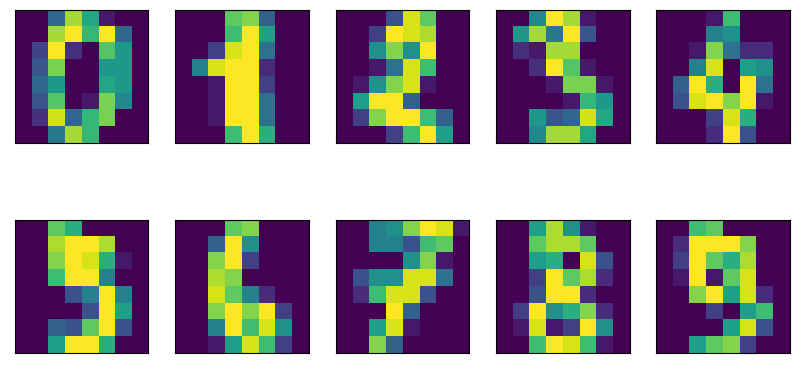

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                            subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Давайте используем PCA для визуализации данных, сведя их к двум
измерениям. Мы построим график первых двух главных компонент и
отметим цветом класс каждой точки

Text(0, 0.5, 'Вторая главная компонента')

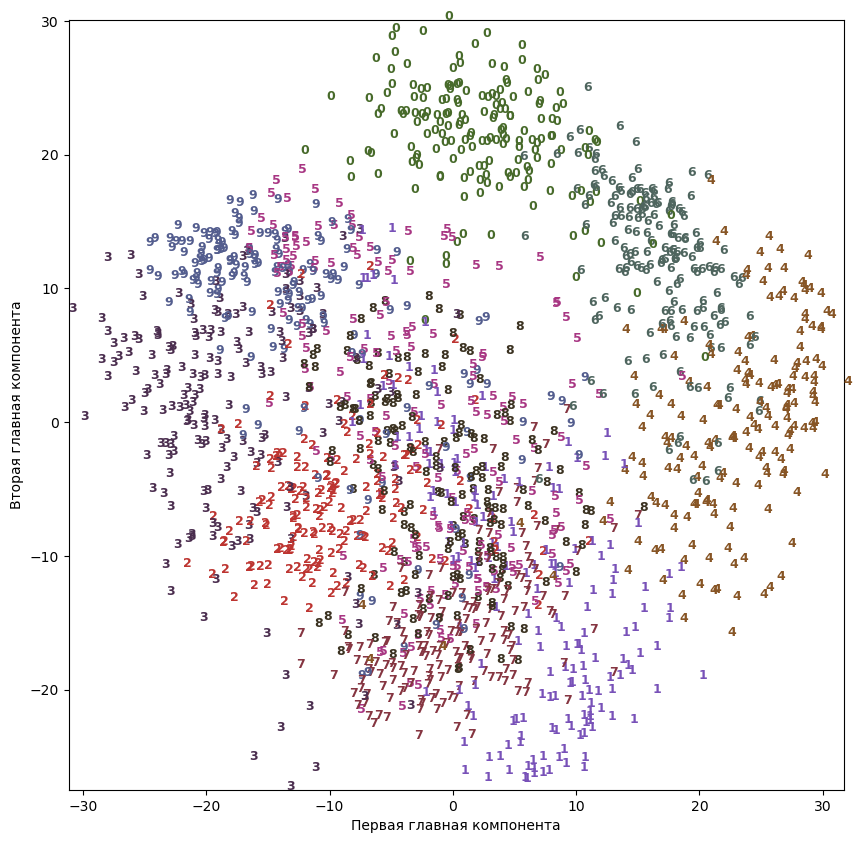

In [4]:
# строим модель PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# преобразуем данные рукописных цифр к первым двум компонентам
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
        color = colors[digits.target[i]],
        fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

Здесь мы вывели фактические классы цифр в виде символов, чтобы
визуально показать расположение каждого класса. Цифры 0, 6 и 4
относительно хорошо разделены с помощью первых двух главных
компонент, хотя по-прежнему перекрывают друг друга. Большинство
остальных цифр значительно перекрывают друг друга.

Давайте применим t-SNE к этому же набору данных и сравним
результаты. Поскольку t-SNE не поддерживает преобразование новых
данных, в классе TSNE нет метода transform. Вместо этого мы можем
вызвать метод fit_transform, который построит модель и немедленно
вернет преобразованные данные

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# используем метод fit_transform вместо fit, т.к. класс TSNE не использует метод transform
digits_tsne = tsne.fit_transform(digits.data)

c:\Users\andru\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\andru\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 0, 't-SNE признак 1')

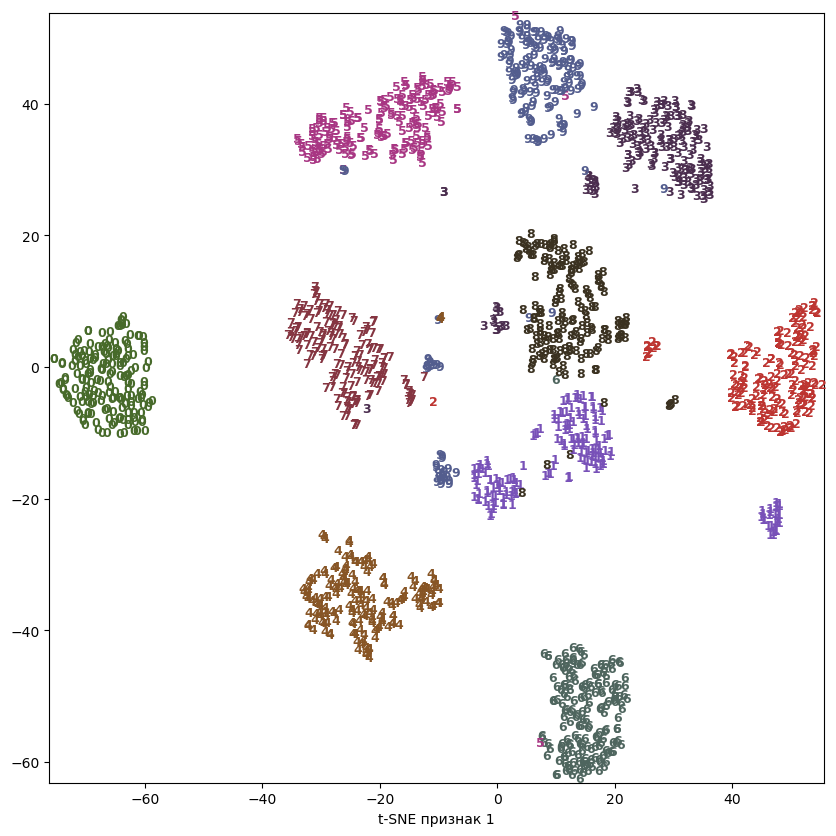

In [8]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
        color = colors[digits.target[i]],
        fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE признак 0")
plt.xlabel("t-SNE признак 1")

Диаграмма рассеяния для набора данных digits, которая использует
первые две главные компоненты, найденные с помощью t-SNE

Результат, полученный с помощью t-SNE, весьма примечателен. Все
классы довольно четко разделены. Единицы и девятки в некоторой
степени распались, однако большинство классов образуют отдельные
сплоченные группы. Имейте в виду, что этот метод не использует
информацию о метках классов: он является полностью
неконтролируемым. Тем не менее он может найти двумерное
представление данных, которое четко разграничивает классы, используя
лишь информацию о расстояниях между точками данных в исходном
пространстве.
Алгоритм t-SNE имеет некоторые настраиваемые параметры, хотя, как
правило, дает хорошее качество, когда используются настройки по
умолчанию. Вы можете поэкспериментировать с параметрами perplexity
и early_exaggeration, но эффекты от их применения обычно
незначительны.

### Кластеризация

Кластеризация k-средних – один из самых простых и наиболее часто
используемых алгоритмов кластеризации. Сначала выбирается число
кластеров k. После выбора значения k алгоритм k-средних отбирает
точки, которые будут представлять центры кластеров (cluster centers).
Затем для каждой точки данных вычисляется его евклидово расстояние
до каждого центра кластера. Каждая точка назначается ближайшему
центру кластера. Алгоритм вычисляет центроиды (centroids) – центры
тяжести кластеров. Каждый центроид – это вектор, элементы которого
представляют собой средние значения характеристик, вычисленные по
всем точкам кластера. Центр кластера смещается в его центроид. Точки
заново назначаются ближайшему центру кластера. Этапы изменения
центров кластеров и переназначения точек итеративно повторяются до
тех пор, пока границы кластеров и расположение центроидов не
перестанут изменяться, т.е. на каждой итерации в каждый кластер будут
попадать одни и те же точки данных. Следующий пример 
иллюстрирует работу алгоритма на синтетическом наборе данных

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

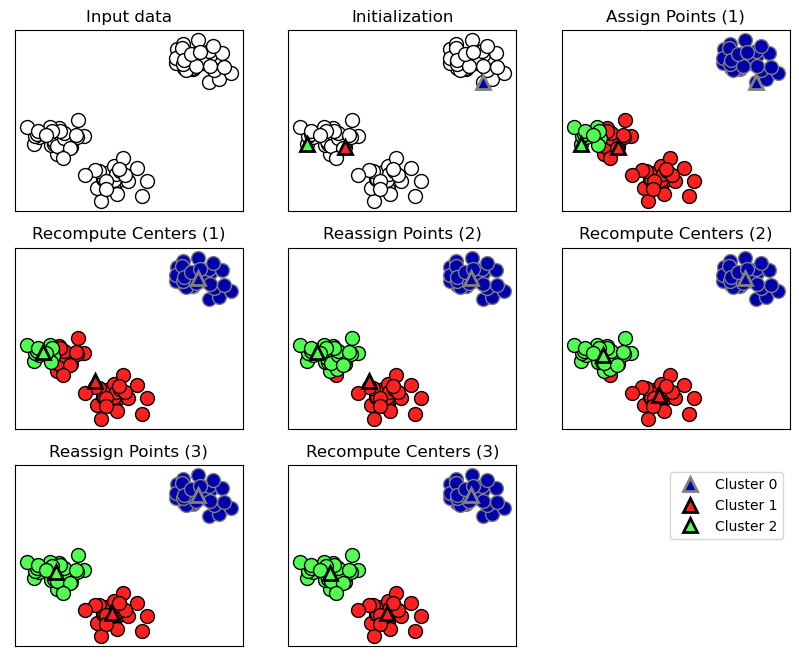

In [9]:
mglearn.plots.plot_kmeans_algorithm()

Исходные данные и этапы алгоритма k-средних

Центры кластеров представлены в виде треугольников, в то время как
точки данных отображаются в виде окружностей. Цвета указывают
принадлежность к кластеру. Мы указали, что ищем три кластера, поэтому
алгоритм был инициализирован с помощью случайного выбора трех
точек данных в качестве центров кластеров (см. «Инициализация»).
Затем запускается итерационный алгоритм. Во-первых, каждая точка
данных назначается ближайшему центру кластера (см. «Назначение
точек (1)»). Затем центры кластеров переносятся в центры тяжести
кластеров (см. «Пересчет центров (1)»). Затем процесс повторяется еще
два раза. После третьей итерации принадлежность точек кластерным
центрам не изменилась, поэтому алгоритм останавливается.
Получив новые точки данных, алгоритм k-средних будет присваивать
каждую точку данных ближайшему центру кластера. Следующий пример
показывает границы центров кластеров, процесс вычисления
которых был приведен на рис.:

c:\Users\biaspaltsau_aa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


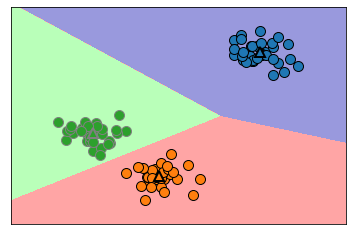

In [8]:
mglearn.plots.plot_kmeans_boundaries()

Центры кластеров и границы кластеров,
найденные с помощью алгоритма k-средних

Применить алгоритм k-средних, воспользовавшись библиотекой
scikit-learn, довольно просто. Здесь мы применяем его к синтетическим
данным, которые использовали для построения предыдущих графиков.
Мы создаем экземпляр класса KMeans и задаем количество выделяемых
кластеров. Затем мы вызываем метод fit и передаем ему в качестве
аргумента данные:

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# генерируем синтетические двумерные данные
X, y = make_blobs(random_state=1)
# строим модель кластеризации
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

Во время работы алгоритма каждой точке обучающих данных X
присваивается метка кластера. Вы можете найти эти метки в атрибуте
kmeans.labels_:

Если вы не зададите количество выделяемых кластеров, то значение n_clusters по умолчанию будет
равно 8. При этом нет никаких конкретных причин, в силу которых вы должны использовать именно
это значение.

In [11]:
print("Принадлежность к кластерам:\n{}".format(kmeans.labels_))

Принадлежность к кластерам:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


Поскольку мы задали три кластера, кластеры пронумерованы от 0 до
2.
Кроме того, вы можете присвоить метки кластеров новым точкам с
помощью метода predict. В ходе прогнозирования каждая новая точка
назначается ближайшему центру кластера, но существующая модель не
меняется. Запуск метода predict на обучающем наборе возвращает тот
же самый результат, что содержится в атрибуте labels_:

In [12]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


Вы можете увидеть, что кластеризация немного похожа на
классификацию в том плане, что каждый элемент получает метку.
Однако нет никаких оснований утверждать, что данная метка является
истинной и поэтому сами по себе метки не несут никакого априорного
смысла. Давайте вернемся к примеру с кластеризацией изображений лиц,
который мы обсуждали ранее. Возможно, что кластер 3, найденный с
помощью алгоритма, содержит лишь лица вашего друга. Впрочем, вы
можете узнать это только после того, как взгляните на фотографии, а
само число 3 является произвольным. Единственная информация,
которую дает вам алгоритм, – это то, что все лица, отнесенные к кластеру
3, схожи между собой.
В случае с кластеризацией, которую мы только что построили для
двумерного синтетического набора данных, это означает, что мы не
должны придавать значения тому факту, что одной группе был присвоен
0, а другой – 1. Повторный запуск алгоритма может привести к
совершенно иной нумерации кластеров в силу случайного характера
инициализации.
Ниже приводится новый график для тех же самых данных.
Центры кластеров записаны в атрибуте cluster_centers_ и мы наносим
их на график в виде треугольников:

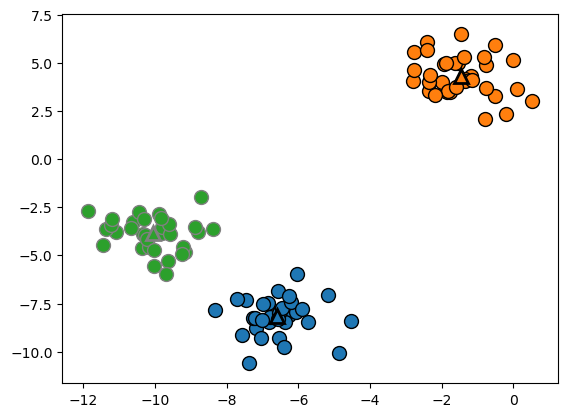

In [13]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
        markers='^', markeredgewidth=2)

Принадлежность к кластерам и центры кластеров, найденные с помощью
алгоритма k-средних, k=3

Кроме того, мы можем увеличить или уменьшить количество центров
кластеров:

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


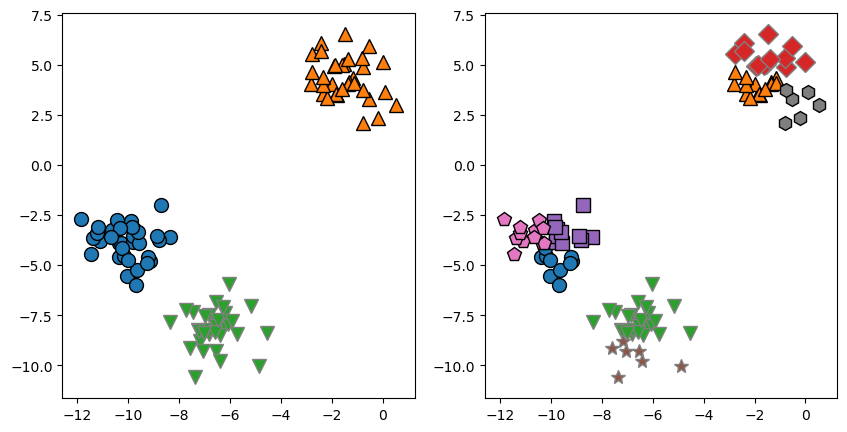

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# использование двух центров кластеров:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# использование пяти центров кластеров:
kmeans = KMeans()
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1]);

Принадлежность к кластерам, найденная с помощью
алгоритма k-средних, k=3 (слева) и k=5 (справа)

Даже если вы знаете «правильное» количество кластеров для
конкретного набора данных, алгоритм k-средних не всегда может
выделить их. Каждый кластер определяется исключительно его центром,
это означает, что каждый кластер имеет выпуклую форму. В результате
этого алгоритм k-средних может описать относительно простые формы.
Кроме того, алгоритм k-средних предполагает, что все кластеры в
определенном смысле имеют одинаковый «диаметр», он всегда проводит
границу между кластерами так, чтобы она проходила точно посередине
между центрами кластеров. Это иногда может привести к неожиданным
результатам, как показано на рис.:

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Признак 1')

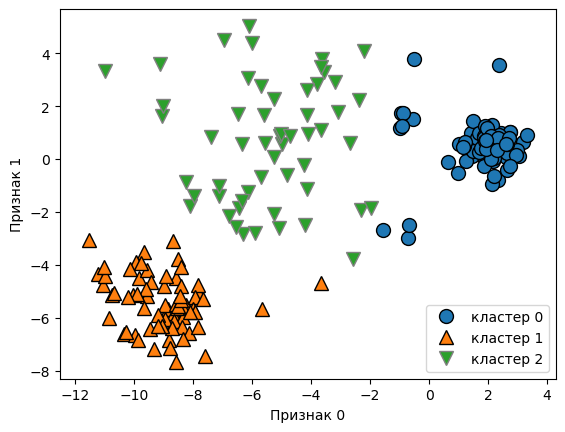

In [19]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["кластер 0", "кластер 1", "кластер 2"], loc='best')
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

Принадлежность к кластерам, найденная с помощью алгоритма
k-средних, при этом кластеры имеют разные плотности

Можно было бы ожидать плотную область в нижнем левом углу,
которая рассматривалась бы в качестве первого кластера, плотную
область в верхнем правом углу в качестве второго кластера и менее
плотную область в центре в качестве третьего кластера. Вместо этого, у
кластера 0 и кластера 1 есть несколько точек, которые сильно удалены
от всех остальных точек этих кластеров, «тянущихся» к центру.
Кроме того, алгоритм k-средних предполагает, что все направления
одинаково важны для каждого кластера. Следующий график 
показывает двумерный набор данных с тремя четко обособленными
группами данных. Однако эти группы вытянуты по диагонали.
Поскольку алгоритм k-средних учитывает лишь расстояние до
ближайшего центра кластера, он не может обработать данные такого
рода:

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'Признак 1')

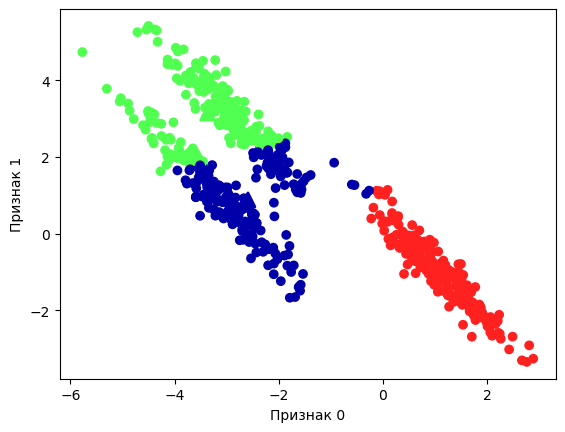

In [20]:
# генерируем случайным образом данные для кластеризации
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# преобразуем данные так, чтобы они были вытянуты по диагонали
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# группируем данные в три кластера
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
192
# строим график принадлежности к кластерам и центров кластеров
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

Алгоритм k-средних не позволяет выявить
несферические кластеры

Кроме того, алгоритм k-средних плохо работает, когда кластеры
имеют более сложную форму, как в случае с данными two_moons:

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Признак 1')

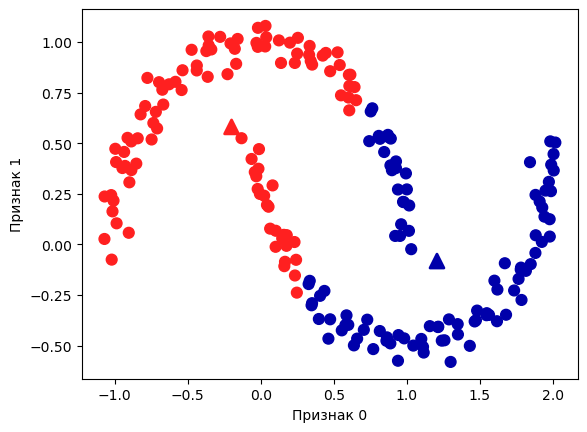

In [21]:
# генерируем синтетические данные two_moons (на этот раз с меньшим количеством шума)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# группируем данные в два кластера
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# строим график принадлежности к кластерам и центров кластеров
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

Алгоритм k-средних не позволяет выявить
кластеры более сложной формы

В данном случае мы понадеялись на то, что алгоритм кластеризации
сможет обнаружить два кластера в форме полумесяцев. Однако
определить их с помощью алгоритма k-средних не представляется
возможным.

### Векторное квантование или рассмотрение алгоритма KMeans как декомпозиционного метода

Несмотря на то что алгоритм k-средних представляет собой алгоритм
кластеризации, можно провести интересные параллели между
алгоритмом k-средних и декомпозиционными методами типа PCA и
NMF, которые мы обсуждали ранее. Возможно, вы помните, что РСА
пытается найти направления максимальной дисперсии данных, в то
время как NMF пытается найти аддитивные компоненты, которые часто
соответствуют «экстремумам» или «группам» данных. Оба
метода пытаются представить данные в виде суммы некоторых
компонент. Алгоритм k-средних, напротив, пытается представить каждую
точку данных в пространстве, используя центр кластера. Вообразите, что
каждая точка представлена с помощью только одной компоненты,
которая задается центром кластера. Рассмотрение алгоритма k-средних
как декомпозиционного метода, в котором каждая точка представлена с
помощью отдельной компоненты, называется векторным квантованием
(vector quantization).

Давайте сравним PCA, NMF и алгоритм k-средних, показав
выделенные компоненты, а также реконструкции
изображений лиц из тестового набора с использованием 100 компонент. В алгоритме k-средних реконструкция изображения – это
ближайший центр кластера, вычисленный на обучающем наборе:

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF

In [26]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

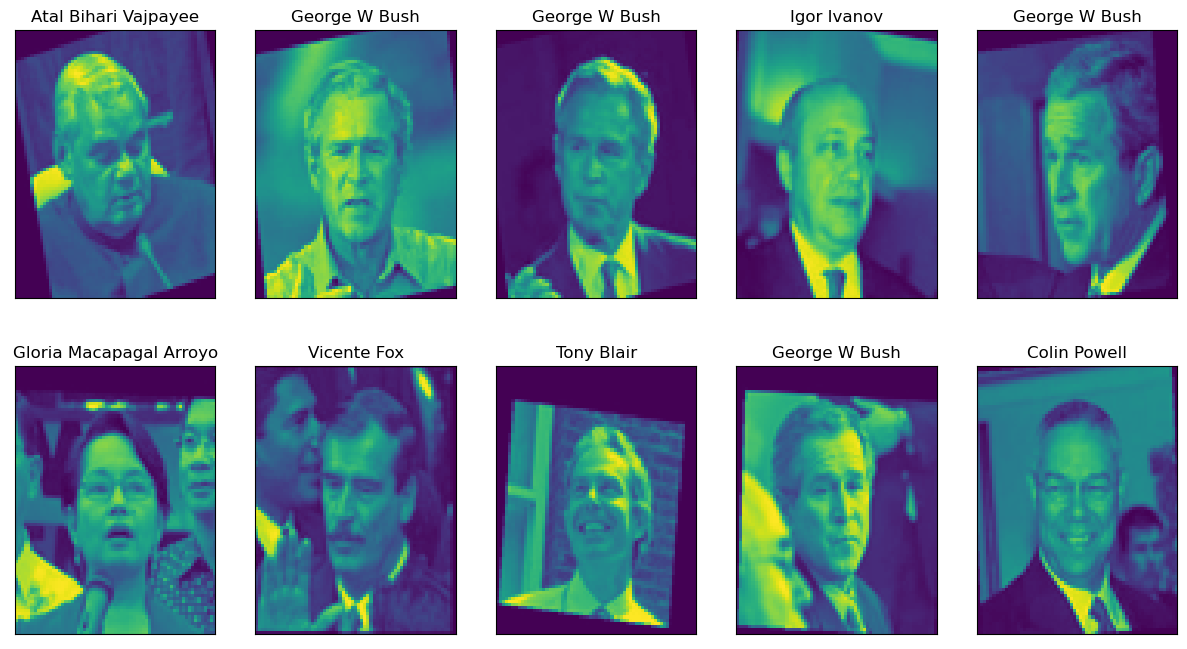

In [27]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [29]:
# получаем данные
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# для получения большей стабильности масштабируем шкалу оттенков серого так, чтобы значения
# были в диапазоне от 0 до 1 вместо использования шкалы значений от 0 до 255
X_people = X_people / 255.

C:\Users\andru\AppData\Local\Temp\ipykernel_7000\3734250896.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

c:\Users\andru\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [34]:
X_train.shape

(535, 5655)

In [35]:
X_reconstructed_kmeans.shape

(179, 5655)

In [32]:
X_reconstructed_nmf.shape

(179, 5655)

Text(0, 0.5, 'nmf')

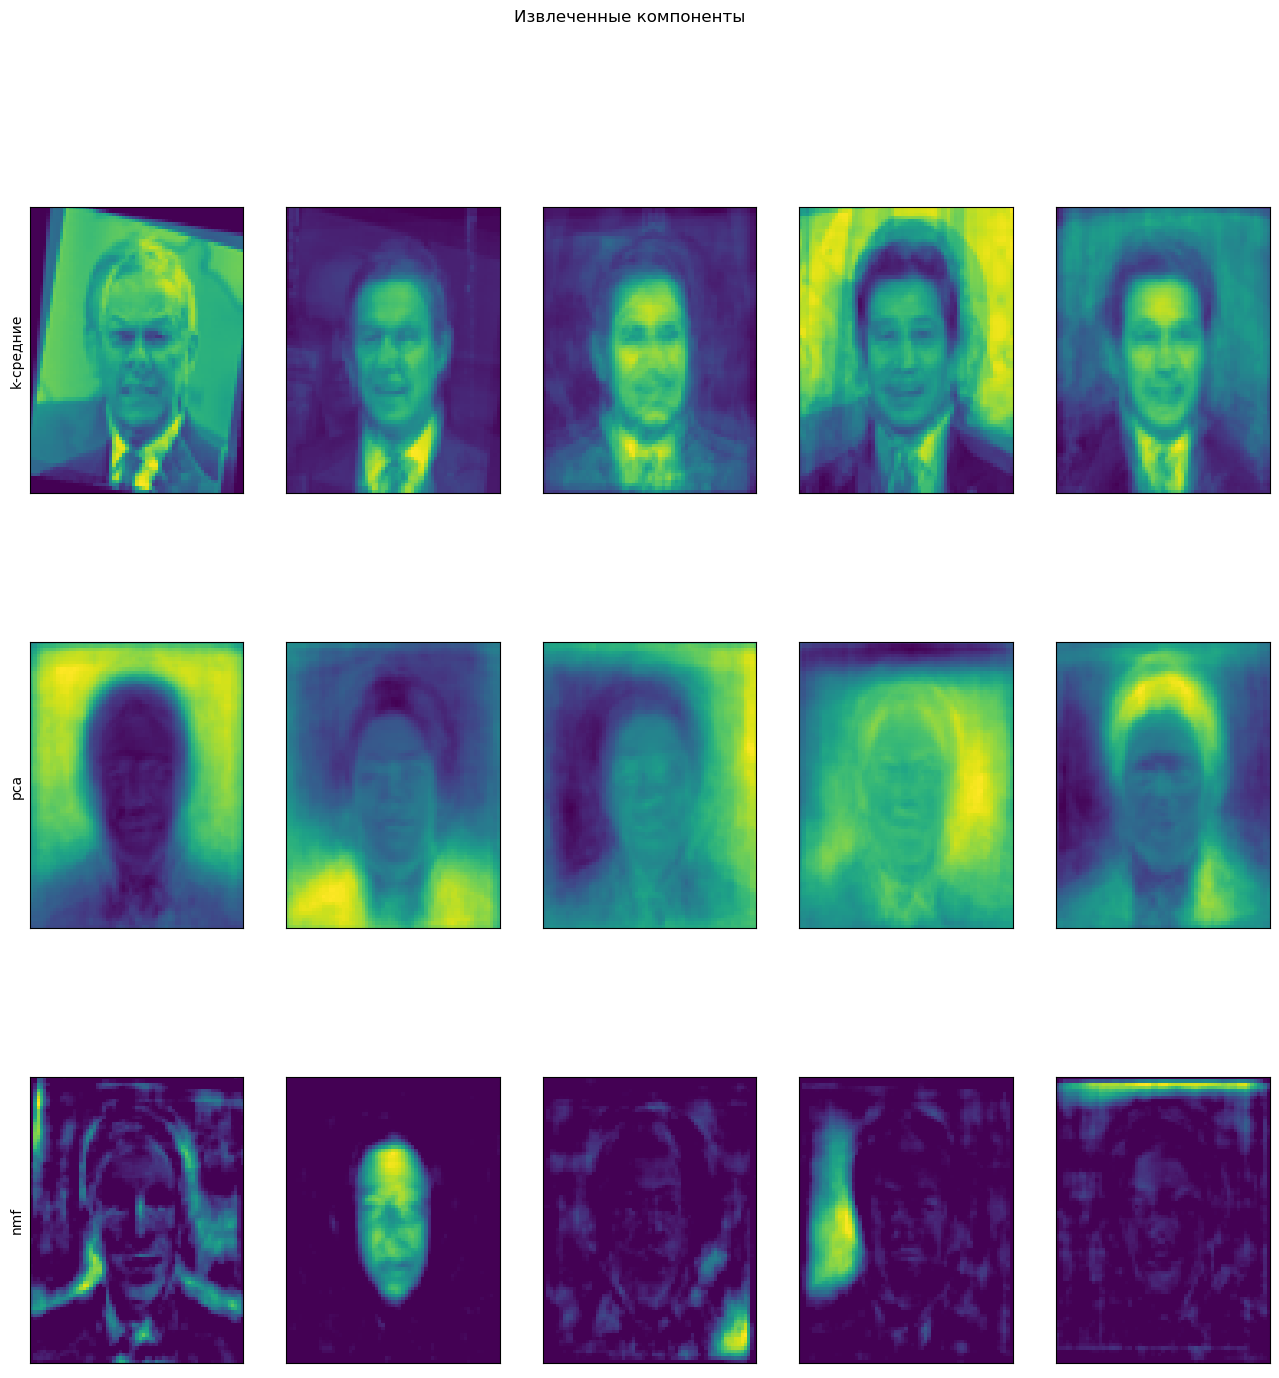

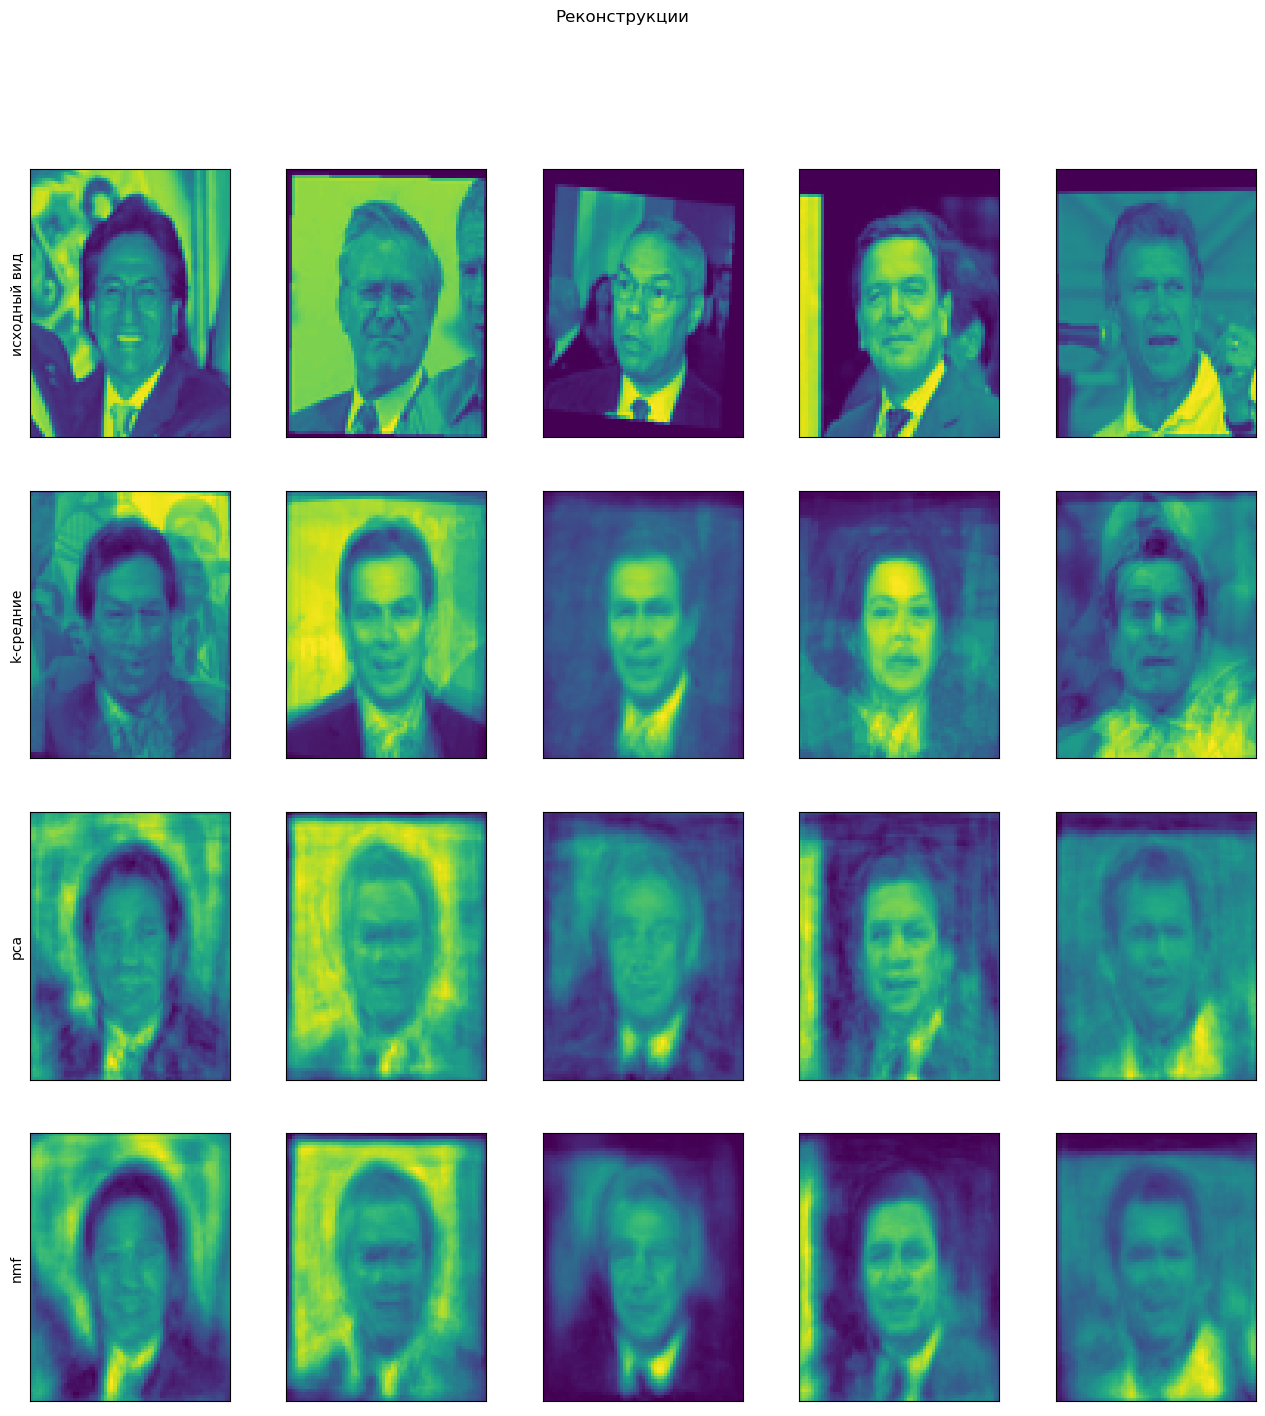

In [36]:
fig, axes = plt.subplots(3, 5, figsize=(16, 16),
                            subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Извлеченные компоненты")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
                            axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("k-средние")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},figsize=(16, 16))
fig.suptitle("Реконструкции")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
                            axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("исходный вид")
axes[1, 0].set_ylabel("k-средние")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

Сравнение центров кластеров, вычисленных с помощью алгоритма k-
средних, и компонент, вычисленных с помощью PCA и NMF

Интересная деталь векторного квантования с помощью алгоритма k-
средних заключается в том, что для представления наших данных мы
можем использовать число кластеров, намного превышающее число
входных измерений. Давайте вернемся к данным two_moons. Применив к
этим данным PCA или NMF, мы ничего примечательного с ними не
сделаем, поскольку данные представлены двумя измерениями. Снижение
до одного измерения с помощью PCA или NMF полностью бы разрушило
структуру данных. Но мы можем найти более выразительное
представление данных с помощью алгоритма k-средних, использовав
большее количество центров кластеров (см. рис.):

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Принадлежность к кластерам:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


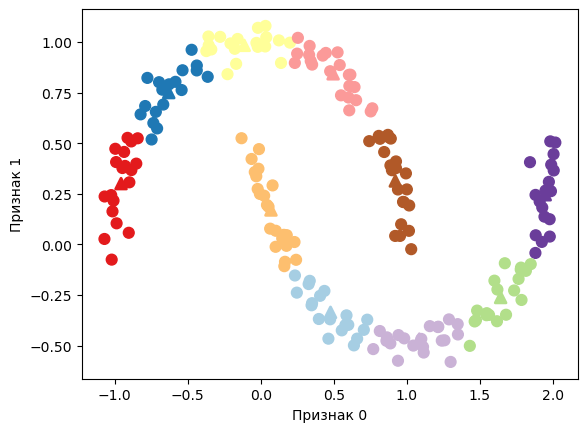

In [37]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
print("Принадлежность к кластерам:\n{}".format(y_pred))

Использование большого количества кластеров для выявления
дисперсии в сложном наборе данных

Мы использовали 10 центров кластеров, это значит, что каждой точке
данных теперь будет присвоен номер от 0 до 9. Мы можем убедиться в
этом, поскольку данные теперь представлены с помощью 10 компонент
(т.е. у нас теперь появилось 10 новых признаков), при этом все признаки
равны 0, за исключением признака, который представляет собой центр
кластера, назначенный конкретной точке данных. Применив это 10-
мерное представление, теперь мы можем отделить эти два скопления
данных в виде полумесяцев с помощью линейной модели, что было бы
невозможным, если бы использовали два исходных признака. Кроме того,
можно получить еще более выразительное представление данных,
используя расстояния до каждого центра кластера в качестве признаков.
Это можно сделать с помощью метода transform класса kmeans:

In [38]:
distance_features = kmeans.transform(X)
print("Форма характеристик-расстояний: {}".format(distance_features.shape))
print("Характеристики-расстояния:\n{}".format(distance_features))

Форма характеристик-расстояний: (200, 10)
Характеристики-расстояния:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


Алгоритм k-средних является очень популярным алгоритмом
кластеризации не только потому, что его относительно легко понять и
реализовать, но и потому, что он работает сравнительно быстро.
Алгоритм k-средних легко масштабируется на большие наборы данных,
а scikit-learn еще и включает в себя более масштабируемый вариант,
реализованный в классе MiniBatchKMeans, который может обрабатывать
очень большие наборы данных.
Один из недостатков алгоритма k-средних заключается в том, что он
зависит от случайной инициализации (т.е. результат алгоритма зависит
от случайного стартового значения). По умолчанию scikit-learn
запускает алгоритм 10 раз с 10 различными случайными стартовыми
значениями и возвращает лучший результат. Дополнительными
недостатками алгоритма k-средних являются относительно строгие
предположения о форме кластеров, а также необходимость задать число
выделяемых кластеров (которое в реальной практике может быть
неизвестно).
Далее мы рассмотрим еще два алгоритма кластеризации, которые в
некотором роде позволяют исправить вышеописанные недостатки.

### Алгомеративная кластеризация

Алгомеративная кластеризация (agglomerative clustering) относится к
семейству алгоритмов кластеризации, в основе которых лежат
одинаковые принципы: алгоритм начинает свою работу с того, что
каждую точку данных заносит в свой собственный кластер и по мере
выполнения объединяет два наиболее схожих между собой кластера до
тех пор, пока не будет удовлетворен определенный критерий остановки.
Критерий остановки, реализованный в scikit-learn – это количество
кластеров, поэтому схожие между собой кластеры объединяются до тех
пор, пока не останется заданное число кластеров. Есть несколько
критериев связи (linkage), которые задают точный способ измерения
«наиболее схожего кластера». В основе этих критериев лежит расстояние
между двумя существующими кластерами.
В scikit-learn реализованы следующие три критерия:

ward

метод по умолчанию ward (метод Варда) выбирает и объединяет два
кластера так, чтобы прирост дисперсии внутри кластеров был
минимальным. Часто этот критерий приводит к получению кластеров
относительно одинакового размера.

average

метод average (метод средней связи) объединяет два кластера,
которые имеют наименьшее среднее значение всех расстояний,
измеренных между точками двух кластеров.


complete


метод complete (метод полной связи или метод максимальной связи)
объединяет два кластера, которые имеют наименьшее расстояние между
двумя их самыми удаленными точками.

ward подходит для большинства наборов данных и мы будем
использовать именно его в наших примерах. Если кластеры имеют
сильно различающиеся размеры (например, один кластер содержит
намного больше точек данных, чем все остальные), использование
критериев average или complete может дать лучший результат.
Следующий график иллюстрирует работу алгоритма
агломеративной кластеризации на двумерном массиве данных, который
ищет три кластера:

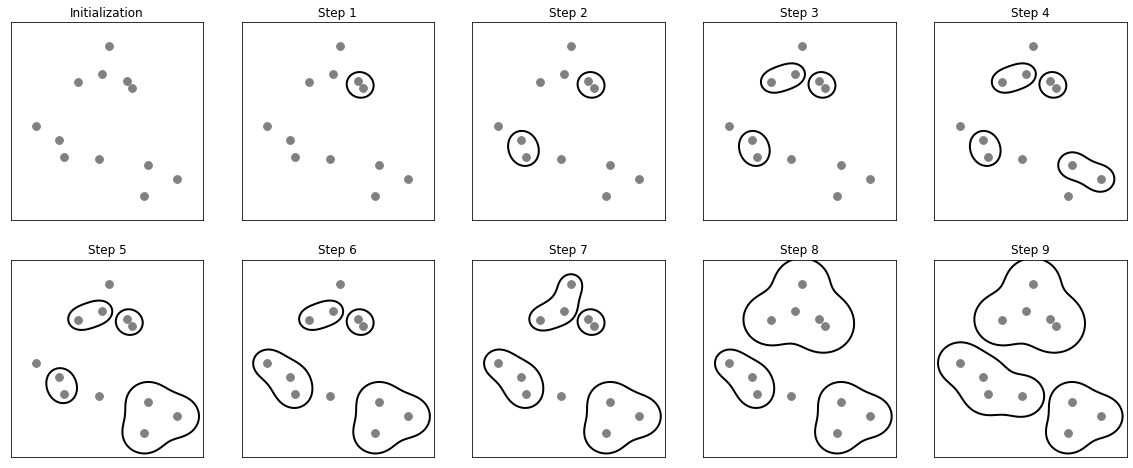

In [40]:
mglearn.plots.plot_agglomerative_algorithm()

Алгоритм агломеративной кластеризации
итеративно объединяет два ближайших кластера

Изначально количество кластеров равно количеству точек данных.
Затем на каждом шаге объединяются два ближайших друг к другу
кластера. На первых четырех шагах выбираются кластеры, состоящие из
отдельных точек, и объединяются в кластеры, состоящие из двух точек.
На шаге 5 один из 2-точечных кластеров вбирает в себя третью точку и
т.д. На шаге 9 у нас остается три кластера. Поскольку мы установили
количество кластеров равным 3, алгоритм останавливается.
Давайте рассмотрим работу алгоритма агломеративной кластеризации
на простых трехкластерных данных, использованных здесь. Из-за своего
способа работы алгоритм агломеративной кластеризации не может
вычислить прогнозы для новых точек данных. Поэтому алгоритм
агломеративной кластеризации не имеет метода predict. Для того, чтобы
построить модель и вычислить принадлежность к кластерам на
обучающем наборе, используйте метод fit_predict.27 Результат показан
на рис.:

Text(0, 0.5, 'Признак 1')

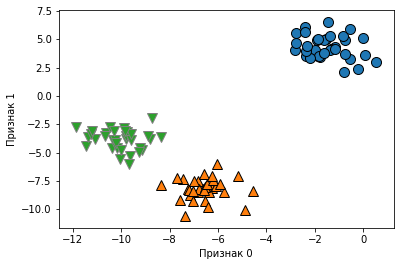

In [41]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

Text(0, 0.5, 'Признак 1')

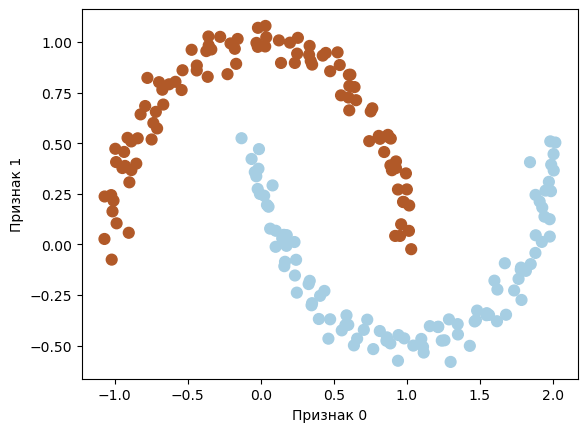

In [42]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
agg = AgglomerativeClustering(n_clusters=2,linkage='single')
y_pred = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')

plt.xlabel("Признак 0")
plt.ylabel("Признак 1")


Принадлежность к кластерам, вычисленная алгоритмом агломеративной
кластеризации с тремя кластерами

Как и ожидалось, алгоритм отлично восстанавливает кластеризацию.
Хотя алгоритм агломеративной кластеризации, реализованный в scikitlearn,
требует указать количество выделяемых кластеров, методы
агломеративной кластеризации в некоторой степени помогают выбрать
правильное количество кластеров, об этом и пойдет речь ниже.

###  Иерархическая кластеризация и дендрограммы

Результатом агломеративной кластеризации является иерархическая
кластеризация (hierarchical clustering). Кластеризация выполняется
итеративно, и каждая точка совершает путь от отдельной точки-кластера
до участника итогового кластера. На каждом промежуточном шаге
происходит кластеризация данных (с разным количеством кластеров).
Иногда полезно сразу взглянуть на все возможные кластеризации.
Следующий пример показывает наложение всех возможных
кластеризаций, показанных на рис. и дает некоторое представление
о том, как каждый кластер распадается на более мелкие кластеры:

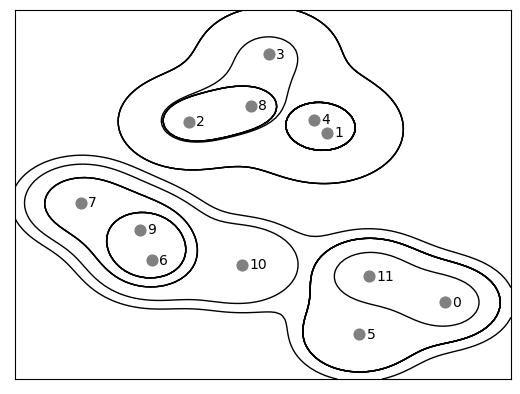

In [43]:
mglearn.plots.plot_agglomerative()

Иерархическое присвоение кластеров (показаны в виде линий),
полученное с помощью алгоритма агломеративной кластеризации,
точки данных пронумерованы

Хотя эта визуализация дает достаточно детализированное
представление о результатах иерархической кластеризации, она
опирается на двумерную природу данных и не может быть использована
для наборов данных, которые имеют более двух характеристик. Однако
есть еще один инструмент для визуализации результатов иерархической
кластеризации, называемый дендрограммой (dendrogram) и
позволяющий обрабатывать многомерные массивы данных.
Вы легко можете создать их с помощью SciPy. По сравнению с алгоритмами кластеризации
scikit-learn алгоритмы кластеризации SciPy имеют немного другой
интерфейс. В SciPy используется функция, которая принимает массив
данных X в качестве аргумента и вычисляет массив связей (linkage array)
с записанными сходствами между кластерами. Затем мы можем скормить
этот массив функции SciPy dendrogram, чтобы построить дендрограмму:

Text(0, 0.5, 'Кластерное расстояние')

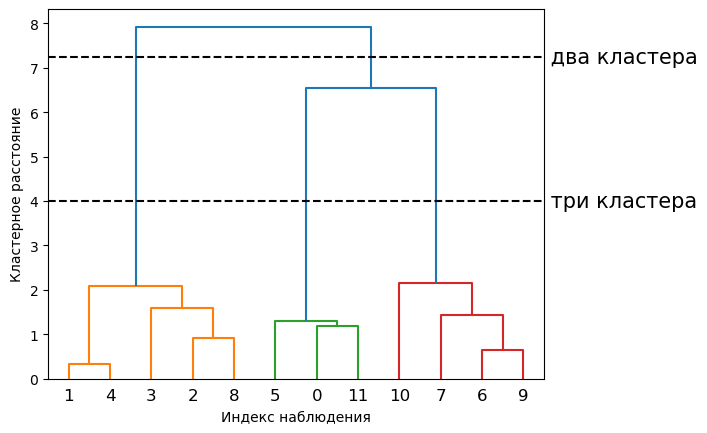

In [44]:
# импортируем функцию dendrogram и функцию кластеризации ward из SciPy
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# применяем кластеризацию ward к массиву данных X
# функция SciPy ward возвращает массив с расстояниями
# вычисленными в ходе выполнения агломеративной кластеризации
linkage_array = ward(X)
# теперь строим дендрограмму для массива связей, содержащего расстояния
# между кластерами
dendrogram(linkage_array)
# делаем отметки на дереве, соответствующие двум или трем кластерам
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' два кластера', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' три кластера', va='center', fontdict={'size': 15})
plt.xlabel("Индекс наблюдения")
plt.ylabel("Кластерное расстояние")

Дендрограмма для кластеризации, показанной на рис., линии
обозначают расщепления на два и три кластера

Точки данных показаны в нижней части дендрограммы
(пронумерованы от 0 до 11). Затем строится дерево с этими точками
(представляющими собой кластеры-точки) в качестве листьев, и для
каждых двух объединенных кластеров добавляется новый узел-родитель.
Чтение дендрограммы происходит снизу вверх. Точки данных 1 и 4
объединяются первыми (как вы уже могли видеть на рис. 3.33). Затем в
кластер объединяются точки 6 и 9 и т.д. На самом верхнем уровне
остаются две ветви, одна ветвь состоит из точек 11, 0, 5, 10, 7, 6 и 9, а
вторая – из точек 1, 4, 3, 2 и 8. Они соответствуют двум крупнейшим
кластерам.
Ось y в дендрограмме указывает не только момент объединения двух
кластеров в ходе работы алгоритма агломеративной кластеризации.
Длина каждой ветви показывает, насколько далеко друг от друга
находятся объединенные кластеры. Самыми длинными ветвями в этой
дендрограмме являются три линии, отмеченные пунктирной чертой с
надписью «три кластера». Тот факт, что эти линии являются самыми
длинными ветвями, указывает на то, что переход от трех кластеров к
двум сопровождался объединением некоторых сильно удаленных друг от
друга точек. Мы снова видим это в самой верхней части графика, когда
объединение двух оставшихся кластеров в единый кластер подразумевает
относительно большое расстояние между точками.
К сожалению, алгоритм агломеративной кластеризации по-прежнему
не в состоянии обработать сложные данные типа набора two_moons. Чего
нельзя сказать о DBSCAN, следующем алгоритме, который мы
рассмотрим.

### DBSCAN

Еще один очень полезный алгоритм кластеризации – DBSCAN (densitybased
spatial clustering of applications with noise – плотностный
алгоритм кластеризации пространственных данных с присутствием
шума). Основные преимущества алгоритма DBSCAN заключаются в том,
что пользователю не нужно заранее задавать количество кластеров,
алгоритм может выделить кластеры сложной формы и способен
определить точки, которые не принадлежат какому-либо кластеру.
DBSCAN работает немного медленнее, чем алгоритм агломеративной
кластеризации и алгоритм k-средних, но также может масштабироваться
на относительно большие наборы данных.
DBSCAN определяет точки, расположенные в «густонаселенных»
областях пространства характеристик, когда многие точки данных
расположены близко друг к другу. Эти области называются плотными
(dense) областями пространства характеристик. Идея алгоритма
DBSCAN заключается в том, что кластеры образуют плотные области
данных, которые отделены друг от друга относительно пустыми
областями.
Точки, находящиеся в плотной области, называются ядровыми
примерами (core samples) или ядровыми точками (core points). Алгоритм
DBSCAN имеет два параметра: min_samples и eps. Если по крайней мере
min_samples точек находятся в радиусе окрестности eps рассматриваемой
точки, то эта точка классифицируется как ядровая. Ядровые точки,
расстояния между которыми не превышают радиус окрестности eps,
помещаются алгоритмом DBSCAN в один и тот же кластер.
На старте алгоритм выбирает произвольную точку. Затем он находит
все точки, удаленные от стартовой точки на расстоянии, не
превышающем радиус окрестности eps. Если множество точек,
находящихся в пределах радиуса окрестности eps, меньше значения
min_samples, стартовая точка помечается как шум (noise), это означает,
что она не принадлежит какому-либо кластеру. Если это множество
точек больше значения min_samples, стартовая точка помечается как
ядровая и ей назначается метка нового кластера. Затем посещаются все
соседи этой точки (находящиеся в пределах eps). Если они еще не были
присвоены кластеру, им присваивается метка только что созданного
кластера. Если они являются ядровыми точками, поочередно посещаются
их соседи и т.д. Кластер растет до тех пор, пока не останется ни одной
ядерной точки в пределах радиуса окрестности eps. Затем выбирается
другая точка, которая еще не была посещена, и повторяется та же самая
процедура.
В итоге получаем три вида точек: ядровые точки, точки, которые
находятся в пределах радиуса окрестности eps ядровых точек (так
называемые пограничные точки или boundary points) и шумовые точки.
При многократном применении алгоритма DBSCAN к конкретному
набору данных результаты кластеризации ядровых точек будут всегда
одинаковыми, при этом одни и те же точки всегда будут помечаться как
шумовые. Однако пограничная точка может быть соседом для ядровых
точек из нескольких кластеров. Поэтому кластерная принадлежность
пограничных точек зависит от порядка посещения точек. Как правило,
существует лишь несколько пограничных точек, поэтому эта слабая
зависимость результатов кластеризации от порядка посещения точек не
имеет значения.
Давайте применим алгоритм DBSCAN к синтетическому набору
данных, который мы использовали для демонстрации агломеративной
кластеризации. Как и алгоритм агломеративной кластеризации, алгоритм
DBSCAN не позволяет получать прогнозы для новых тестовых данных,
поэтому мы воспользуемся методом fit_predict, чтобы сразу выполнить
кластеризацию и возвратить метки кластеров:

In [48]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=20)
dbscan = DBSCAN(min_samples=2)
clusters = dbscan.fit_predict(X)
print("Принадлежность к кластерам:\n{}".format(clusters))

Принадлежность к кластерам:
[-1  0 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  0 -1  0 -1  1]


Можно увидеть, что всем точкам данных была присвоена метка -1,
которая обозначает шум. Полученная сводка является результатом
применения значений eps и min_samples, установленных по умолчанию
и не настроенных для работы с небольшими синтетическими наборами 
данных. Принадлежность к кластерам для различных значений
min_samples и eps показана в сводке и визуализирована на рис.:

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


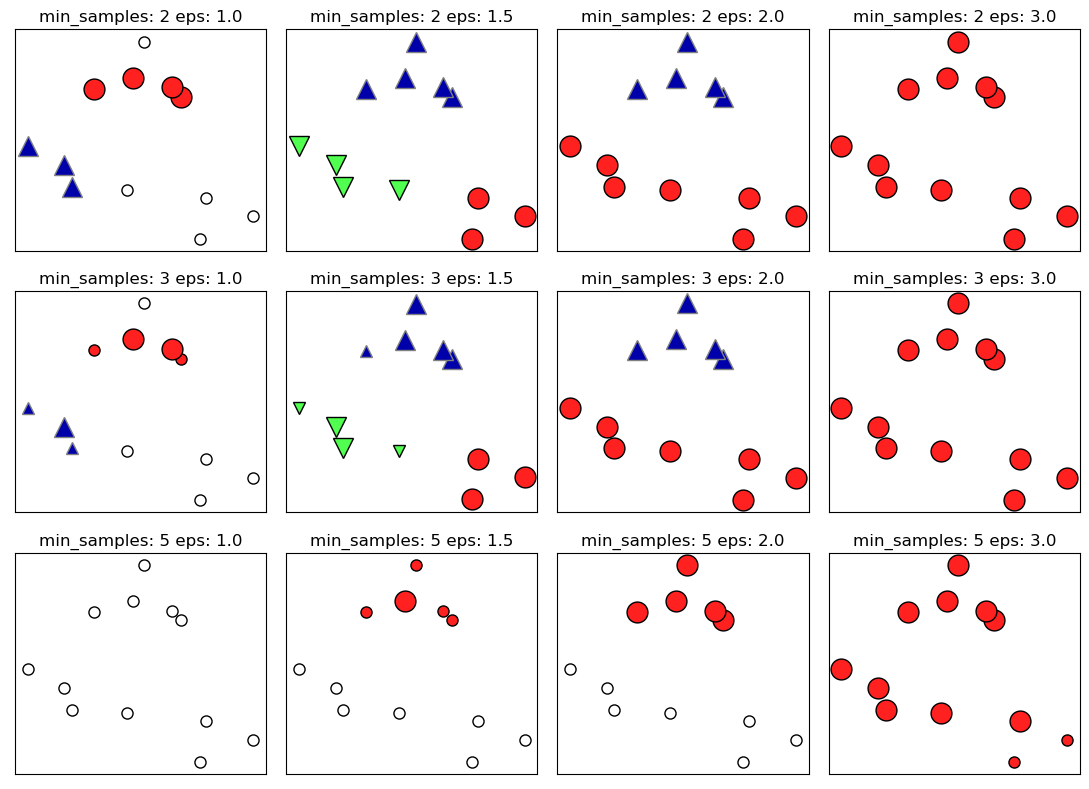

In [49]:
mglearn.plots.plot_dbscan()

Принадлежность к кластерам, вычисленная с помощью алгоритма
DBSCAN при различных значениях min_samples и eps

На этом графике точки, которые принадлежат кластерам, окрашены
сплошным цветом, а шумовые точки – белым цветом. Ядровые точки
показаны в виде больших маркеров, тогда как пограничные точки
отображаются в виде небольших маркеров. Увеличение значения eps
(слева направо на рисунке) означает включение большего количества
точек в кластер. Это приводит к росту размеров кластеров, но также
может привести к тому, что несколько кластеров будут объединены в
один. Увеличение значения min_samples (сверху вниз на рисунке)
означает уменьшение количества ядерных точек и увеличение
количества шумовых точек.
Параметр eps чуть более важен, поскольку он определяет, что
подразумевается под «близостью» точек друг к другу. Очень маленькое
значение eps будет означать отсутствие ядерных точек и может привести
к тому, что все точки будут помечены как шумовые. Очень большое
значение eps приведет к тому, что все точки сформируют один кластер.
Значение min_samples главным образом определяет, будут ли точки,
расположенные в менее плотных областях, помечены как выбросы или
как кластеры. Если увеличить значение min_samples, все, что могло бы
стать кластером с количеством точек, не превышающим min_samples,
будет помечено как шум. Поэтому значение min_samples задает
минимальный размер кластера. Это очень четко можно увидеть на рис.
3.37, когда мы увеличиваем значение min_samples с 3 до 5 при eps=1.5.
При min_samples =3 получаем три кластера: первый кластер состоит из
четырех точек, второй – из пяти точек и третий – из трех точек. При
min_samples=5 два кластера меньшего размера (с тремя и четырьмя
точками) теперь помечены как шум и остается лишь кластер с пятью
точками.
Несмотря на то что в алгоритме DBSCAN не нужно явно указывать
количество кластеров, значение eps неявно задает количество
выделяемых кластеров. Иногда подобрать оптимальное значение eps
становится проще после масштабирования данных с помощью
StandardScaler или MinMaxScaler, так как использование этих методов
масштабирования гарантирует, что все характеристики будут иметь
одинаковый масштаб.
Следующий рис. показывает результат выполнения алгоритма DBSCAN для
наборе данных two_moons. Алгоритм фактически находит две группы
данных в форме полумесяцев и разделяет их, используя настройки по
умолчанию:

In [50]:
from sklearn.preprocessing import StandardScaler

Text(0, 0.5, 'Признак 1')

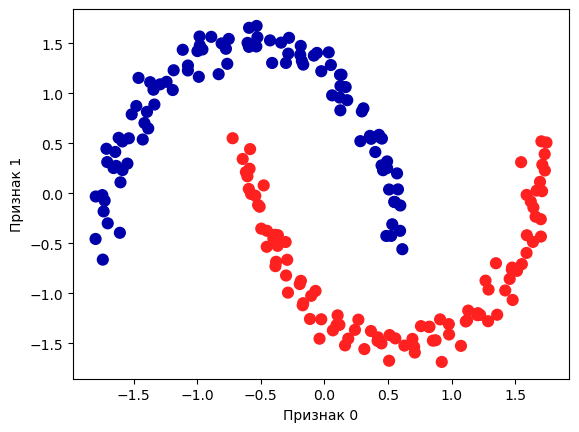

In [56]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# масштабируем данные так, чтобы получить нулевое среднее и единичную дисперсию
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN(eps=0.5)
clusters = dbscan.fit_predict(X_scaled)
# выводим принадлежность к кластерам
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

In [55]:
clusters

array([ 0,  1,  2, -1,  3,  3,  0,  1,  0,  1,  6,  4,  3,  1,  5,  0,  6,
        4,  6,  6,  3,  1,  6,  1,  6,  4,  3,  3,  4,  6,  0, -1,  1,  2,
        6,  3,  4,  0,  5,  2,  1,  6,  6,  4,  1,  6,  0,  5,  4,  1,  6,
        4,  3, -1,  1,  6,  6,  1,  6,  6,  4,  5,  3,  0,  1,  5,  6,  1,
        6,  5,  1,  5,  1, -1,  1,  5,  2,  0,  6,  1,  3,  6,  1,  3,  2,
        6,  0,  6,  1,  3,  6,  0,  3,  6,  3,  3,  3,  4,  5,  4, -1,  3,
        6,  0,  5,  2,  5,  6,  1,  6,  6,  6,  6,  5,  0,  1,  6,  3,  1,
        0,  0,  5,  2,  6,  2,  5,  0,  4,  1,  3,  0,  6,  5,  4,  1,  3,
        1,  5,  3,  0,  4,  2,  6,  6,  6,  0,  4,  1,  6,  2,  1,  1,  0,
        6,  1,  6,  1,  4,  6,  6,  4,  1,  6,  1,  1,  3,  6,  1,  1,  1,
        6, -1,  5,  5,  4,  1,  3,  5,  5,  6,  1,  5,  3,  1,  3,  6,  6,
        1,  5,  6,  5,  6,  0,  0,  2,  6,  3,  4,  6,  3], dtype=int64)

Поскольку алгоритм выделил нужное количество кластеров (два),
настройки параметров, похоже, работают хорошо. Если мы уменьшим
значение eps до 0.2 (значение по умолчанию 0.5), мы получим восемь
кластеров, что явно слишком много. Увеличение eps до 0.7 даст один
кластер.
Используя DBSCAN, будьте осторожны при работе с возвращаемыми
номерами кластеров. Использование -1 для обозначения шума может
привести к неожиданным эффектам, если метки кластеров будут
использоваться для индексирования другого массива.

### Сравнение различных алгоритмов кластеризации на игрушечных наборах данных

В следующем примере показаны сравнительные характеристики различных алгоритмов кластеризации в двумерных наборах данных.
За исключением последнего набора данных, параметры каждой из наборов данных и алгоритмов настроены для получения 
хороших результатов кластеризации. Некоторые алгоритмы более чувствительны к значениям параметров, чем другие. 
Последний набор данных является примером равномерно зашумленной ситуации для кластеризации - 
данные однородны, и в них нет явно выделенных кластеров. В этом примере используется те же параметры алгоритма, 
что и в наборе данных в строке над ним. В результате этого видно несоответствие значений параметров алгоритмов
к структуре данных. Хотя эти примеры дают некоторое представление об алгоритмах, однако оно
может не относиться к данным очень большого размера.

In [76]:
%matplotlib inline

In [77]:
print(__doc__)

Automatically created module for IPython interactive environment


In [57]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\andru\AppData\Local\Temp\ipykernel_7000\2413745067.py:122: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = algorithm.labels_.astype(np.int)
C:\Users\andru\AppData\Local\Temp\ipykernel_7000\2413745067.py:12

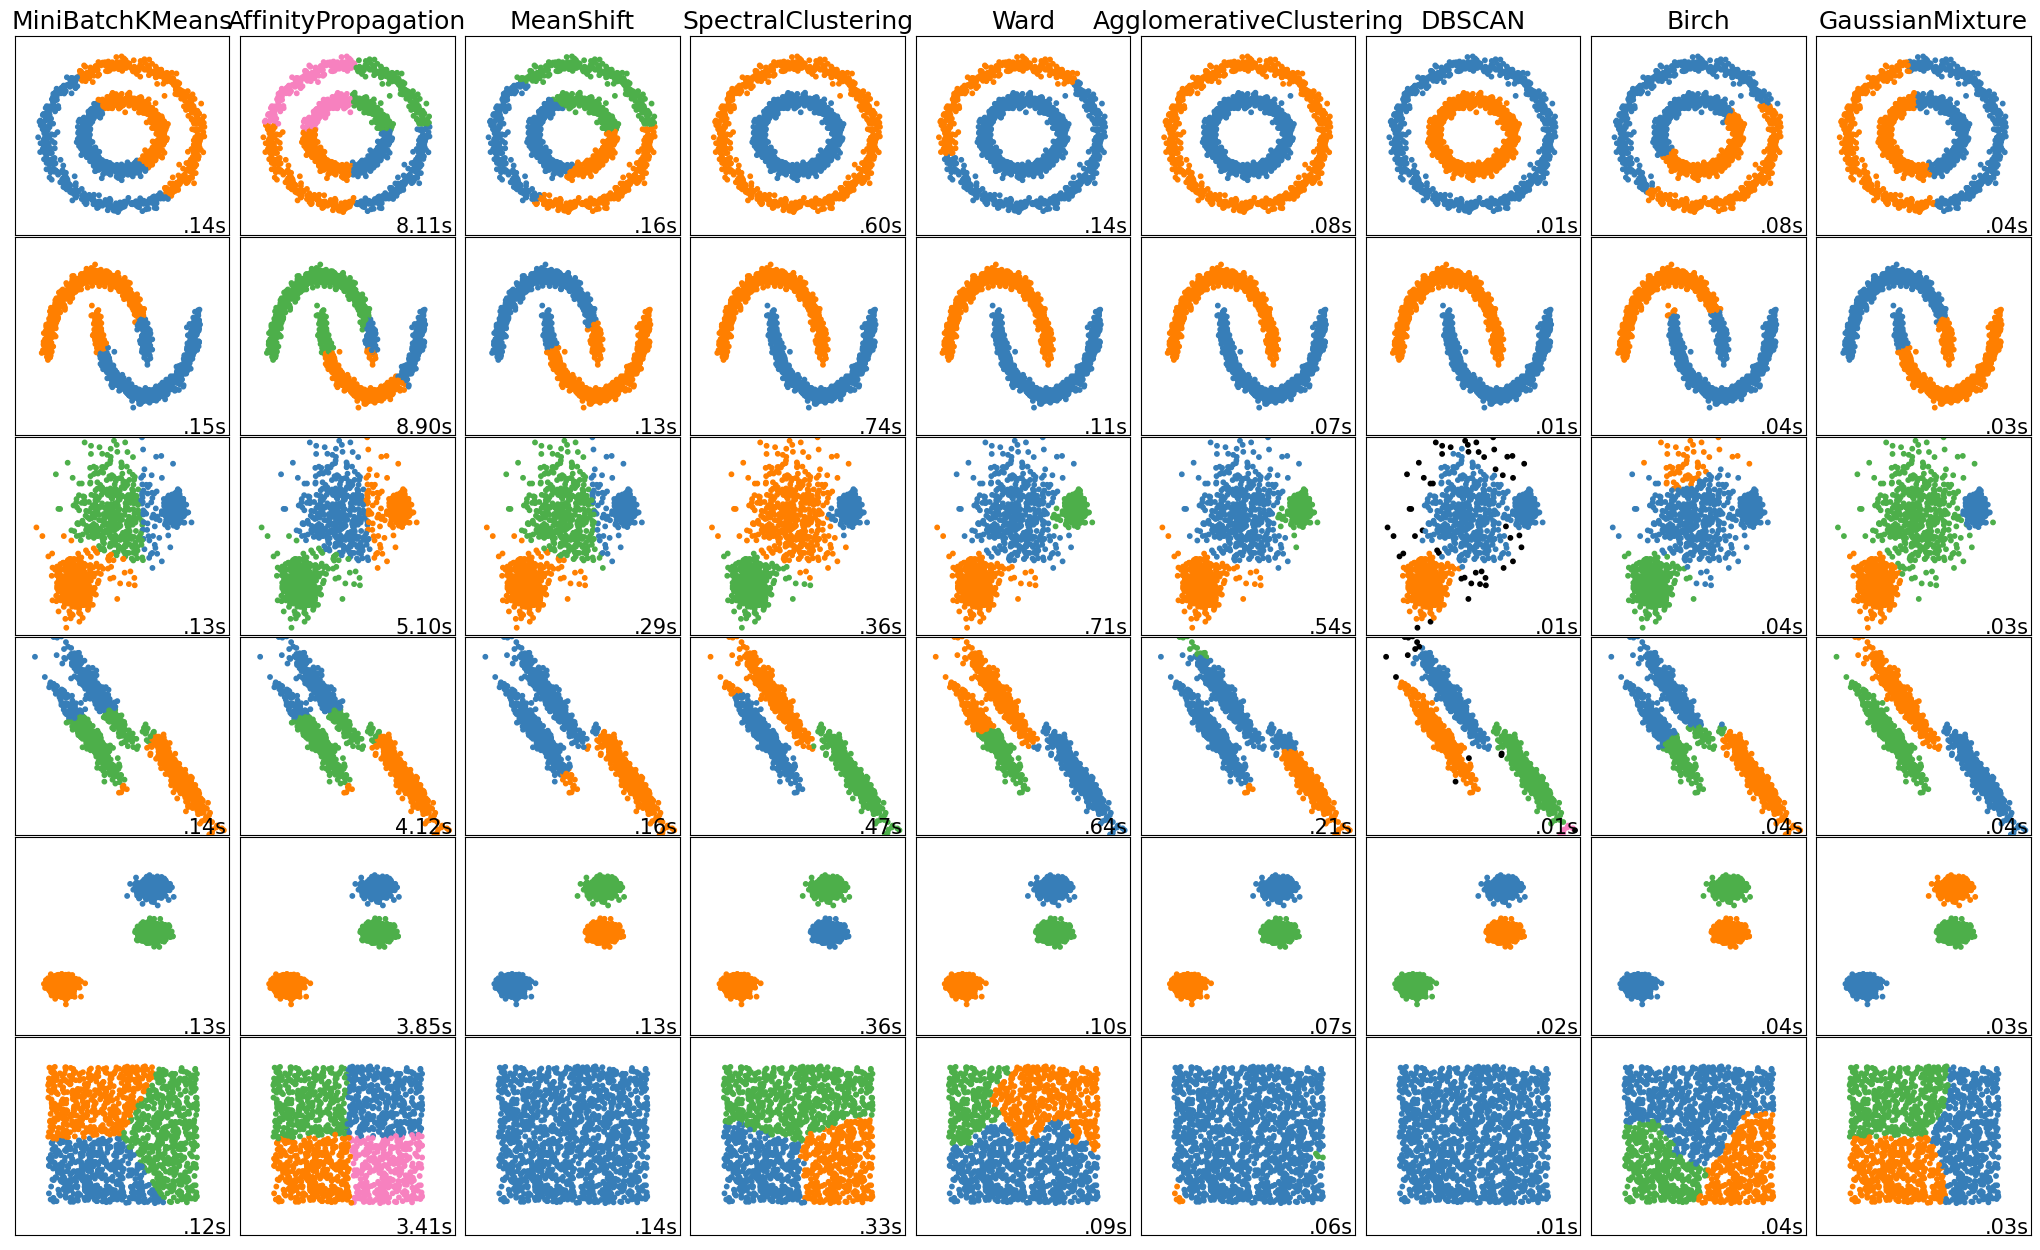

In [58]:
# ============
# Генерация датасета. Можно выбрать размер выборки и масштабируемость
# алгоритмов, но не очень большую т.к. будет очень долго выполняться
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Неравномерно распределнные данные
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# Кластеры с различными вариациями
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Задание размеров кластеров
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # обновление параметров  
    
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # нормализую для облегчения выбора параметров алгоритма
    X = StandardScaler().fit_transform(X)

    # оценка пропскной спосбности для mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # создание матрицы связности
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # создание данных симметричными
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Создание объектов кластеров
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # обработка исключений для kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # добавляю черный цвет для выбросов если они есть
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

### Сравнение и оценка качества алгоритмов кластеризации

Одна из проблем, связанных с применением алгоритмов кластеризации,
заключается в том, что очень трудно оценить качество работы алгоритма
и сравнить результаты, полученные с помощью различных алгоритмов.
Рассказав об алгоритмах k-средних, агломеративной кластеризации и
DBSCAN, мы теперь сравнив их, применив к некоторым реальным
наборам данных. Существует показатели, которые можно использовать для оценки
результатов с точки зрения истинной кластеризации. Наиболее важными
среди них являются скорректированный коэффициент Рэнда (adjusted
Rand index, ARI) и нормализованная взаимная информация (normalized
mutual information, NMI), которые представляют собой количественные
показатели. Они принимают значения, близкие к 0, при случайном
назначении кластеров, и значение 1, когда полученные результаты
кластеризации полностью совпадают с фактическими (обратите
внимание, скорректированный коэффициент Рэнда может принимать
значения от -1 до 1).
В данном случае мы сравним алгоритмы k-средних, агломеративной
кластеризации и DBSCAN, используя ARI. Кроме того, для сравнения
мы включим результаты кластеризации, полученные при случайном
назначении точек двум кластерам.

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


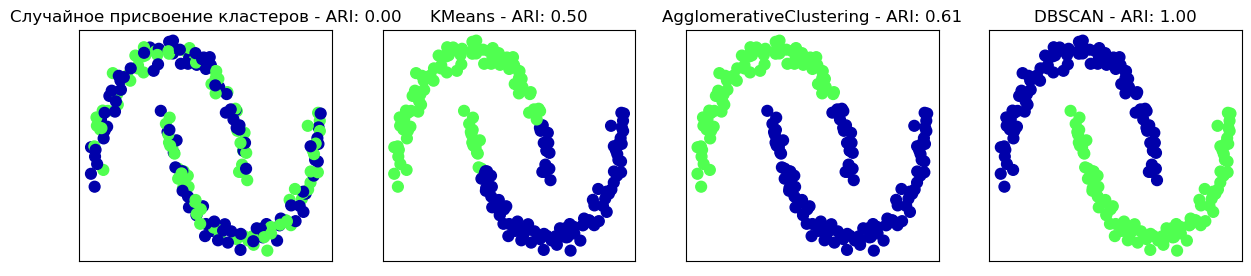

In [60]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# масштабируем данные так, чтобы получить нулевое среднее и единичную дисперсию
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                            subplot_kw={'xticks': (), 'yticks': ()})
# создаем список используемых алгоритмов
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]
# случайно присваиваем точки двум кластерам для сравнения
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# выводим на графике результаты случайного присвоения кластеров
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,cmap=mglearn.cm3, s=60)
axes[0].set_title("Случайное присвоение кластеров - ARI: {:.2f}".format(
                    adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
# выводим на графике принадлежность к кластерам и центры кластеров
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
    cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                    adjusted_rand_score(y, clusters)))

Скорректированный коэффициент Рэнда показывает интуитивно
понятные результаты, случайное присвоение кластеров получает оценку
0, а DBSCAN (который отлично восстанавливает нужные кластеры) –
оценку 1.
Наиболее частая ошибка, возникающая при оценке результатов
кластеризации, заключается в использовании accuracy_score вместо
adjusted_rand_score, normalized_mutual_info_score или какой-либо
другого показателя качества кластеризации. Проблема, связанная с
использованием правильности, заключается в том, что оценка
правильности требует точного соответствия меток кластеров,
присвоенных точкам, истинным меткам кластеров (ground truth). Однако
сами по себе метки кластеров не имеют смысла. Единственное, что имеет
значение, это то, какие точки находятся в одном и том же кластере:

In [63]:
from sklearn.metrics import accuracy_score
# эти две маркировки точек соответствуют одним и тем же результатам кластеризации
# в clusters1 записаны фактические результаты кластеризации,
# а в clusters2 записаны расчетные результаты кластеризации
clusters1 = [0, 0, 1, 1, 0,2,2,2]
clusters2 = [1, 1, 0, 0, 1,3,3,3]
# правильность равна нулю, поскольку ни одна из присвоенных меток не отражает
# истинную кластеризацию
print("Правильность: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# значение скорр. коэффициента Рэнда равно 1, поскольку полученные результаты
# точно воспроизводят истинную кластеризацию
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Правильность: 0.00
ARI: 1.00


### Оценка качества кластеризации без использования метрик, предполагающих знание истинной кластеризации

Несмотря на то, что мы только что показали один из способов оценить
работу алгоритмов кластеризации, на практике использование метрик
типа ARI сопряжено с большими проблемами. При использовании
алгоритмов кластеризации, информация об истинных кластерах, с
которой можно было бы сравнить полученные результаты, как правило,
отсутствует. Если бы мы знали, как выглядит правильная кластеризация
данных, мы могли бы использовать эту информацию, чтобы построить
модель контролируемого обучения типа классификатора. Поэтому,
использование таких показателей, как ARI и NMI, как правило, помогает
в разработке алгоритмов, но не в оценке их эффективности с точки
зрения конкретного применения.
Существуют метрики кластеризации, которые не требуют знания
истинных результатов кластеризации, например, силуэтный
коэффициент (silhouette coefficient). Однако на практике они работают
плохо. Силуэтная мера вычисляет компактность кластера, более высокое
значение соответствует лучшему результату, идеальное значение равно 1.
Несмотря на то, что компактные кластеры удобны, компактность не
предполагает сложных форм.
Ниже приведен пример сравнения результатов, полученных с
помощью алгоритмов k-средних, агломеративной кластеризации и
DBSCAN для набора two_moons, при этом использовалась силуэтная мера:

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


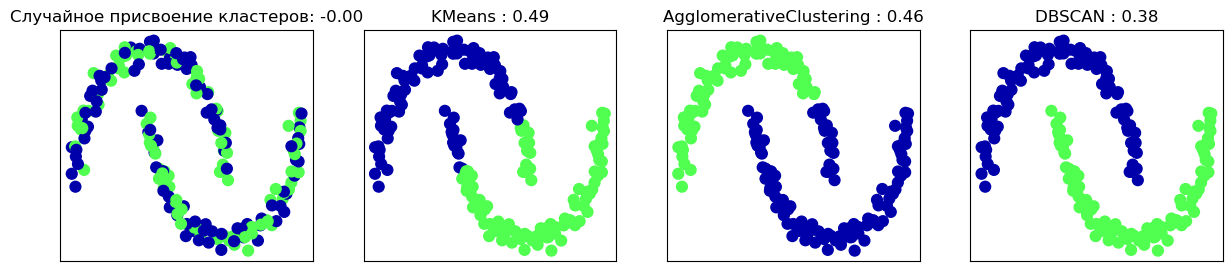

In [64]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# масштабируем данные так, чтобы получить нулевое среднее и единичную дисперсию
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
subplot_kw={'xticks': (), 'yticks': ()})
# случайно присваиваем точки двум кластерам для сравнения
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# выводим на графике результаты случайного присвоения кластеров
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                    cmap=mglearn.cm3, s=60)
axes[0].set_title("Случайное присвоение кластеров: {:.2f}".format(
                    silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
                DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
# выводим на графике принадлежность к кластерам и центры кластеров
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                    silhouette_score(X_scaled, clusters)))

Можно увидеть, что алгоритм k-средних получает самое высокое
значение силуэтного коэффициента, хотя мы, возможно, предпочтем
результаты, полученные с помощью алгоритма DBSCAN. Чуть более
лучшая стратегия для оценки результатов кластеризации заключается в
использовании метрик кластеризации на основе робастности (robustnessbased
clustering metrics). Эти метрики запускают алгоритм после
добавления некоторого шума в данные или применяют различные
настройки параметров, а затем сравнивают полученные результаты. Идея
заключается в том, что если разные значения параметров и разные
возмущения данных возвращают один и тот же результат, ему, вероятно,
можно доверять.

Даже если мы получим очень робастные результаты кластеризации
или очень высокое значение силуэтной меры, у нас по-прежнему будет
отсутствовать информация о том, несут ли результаты кластеризации
какой-то содержательный смысл, отражают ли они те аспекты данных,
которые нас интересуют. Давайте вернемся к примеру с изображениями
лиц. Мы надеемся выделить группы схожих между собою лиц, скажем,
мужчин и женщин, либо пожилых и молодых, или людей с бородой и без
бороды. Допутим, мы сгруппировали данные в два кластера, и все
алгоритмы единодушны о том, какие точки данных должны быть
объединены в кластеры. Мы по-прежнему не знаем, соответствуют ли
найденные кластеры интересующим нас гипотезам. Вполне возможно,
что они выделили лица в профиль и лица в анфас или снимки, сделанные
в ночное время, и снимки, сделанные днем, фото, сделанные с айфонов и
фото, сделанные с телефонов с операционной системой Android.
Единственный способ узнать, соответствует ли кластеризация
интересующей нас информации, проанализировать кластеры вручную.

### Сравнение работы изображений на наборе изображений лиц

Давайте применим алгоритмы k-средних, DBSCAN и агломеративной
кластеризации к набору данных Labeled Faces in the Wild и посмотрим,
сможет ли какой-либо из этих алгоритмов найти интересную структуру.
Мы воспользуемся собственными векторами (собственными лицами),
вычисленными для всего набора изображений лиц при помощью
PCA(whiten=True), выделялось 100 компонент:

In [143]:
# получаем данные
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:100]] = 1
people = fetch_lfw_people()
X_people = people.data #[mask]
y_people = people.target#[mask]
# для получения большей стабильности масштабируем шкалу оттенков серого так, чтобы значения
# были в диапазоне от 0 до 1 вместо использования шкалы значений от 0 до 255
#X_people = X_people / 255.
image_shape = people.images[0].shape

C:\Users\andru\AppData\Local\Temp\ipykernel_7000\2718853233.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [144]:
X_people.shape

(2258, 2914)

In [145]:
# извлекаем собственные лица для набора данных lfw и преобразуем данные
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [146]:
X_pca

array([[-0.4530941 ,  0.054164  ,  2.2417066 , ...,  1.3530943 ,
        -0.35875565,  0.8718098 ],
       [ 2.4200103 , -0.45092386, -0.8596634 , ..., -0.6348512 ,
        -0.9626356 ,  0.8339922 ],
       [-1.070906  ,  0.5207145 , -0.59159935, ...,  0.77943504,
         0.78120023,  0.13121149],
       ...,
       [-0.93180615, -0.40471068, -0.14328931, ...,  1.6490753 ,
        -1.1127678 ,  0.39317003],
       [-0.69085526,  0.6636174 ,  0.21460734, ...,  0.16094887,
        -0.41540283, -0.1895268 ],
       [-1.5885018 , -0.2658034 ,  0.8551804 , ..., -0.18894932,
        -0.12830661,  0.9601811 ]], dtype=float32)

Ранее мы видели, что данная операция позволяет получить более
содержательную информацию об изображениях лиц в отличие от
исходных пикселей. Кроме того, она позволяет увеличить скорость
вычислений. Здесь будет полезно запустить алгоритмы на исходных
данных, без применения PCA, и выяснить, смогли ли алгоритмы
выделить аналогичные кластеры.

In [147]:
# применяем алгоритм DBSCAN, используя параметры по умолчанию
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Уникальные метки: {}".format(np.unique(labels)))

Уникальные метки: [-1]


Мы видим, что все возвращенные метки имеют значение -1, таким
образом, согласно алгоритму DBSCAN все данные были помечены как
«шум». Здесь у нас есть два инструмента, что исправить эту ситуацию:
мы можем увеличить значение eps, чтобы расширить окрестность каждой
точки и уменьшить значение min_samples, чтобы рассматривать в
качестве кластеров группы с меньшим количеством точек. Давайте
сначала попробуем изменить значение min_samples:

In [148]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Уникальные метки: {}".format(np.unique(labels)))

Уникальные метки: [-1]


Даже при количестве точек в группе, равном 3, все точки помечаются
как шум. Таким образом, нам нужно увеличить значение eps:

In [149]:
dbscan = DBSCAN(min_samples=3, eps=14)
labels = dbscan.fit_predict(X_pca)
print("Уникальные метки: {}".format(np.unique(labels)))

Уникальные метки: [-1  0]


Задав значительно большее значение eps (15), мы получаем только
один кластер и шумовые точки. Мы можем воспользоваться этим
результатом, чтобы выяснить, что представляет из себя «шум» по
сравнению с остальными данными. Чтобы лучше понять суть
происходящего, давайте выясним, сколько точек являются шумовыми и
сколько точек находятся внутри кластера:

In [150]:
# Считаем количество точек в кластерах и шум.
# bincount не допускает отрицательных цифр, поэтому нам нужно добавить 1.
# Первая цифра в выводе соответствует количеству шумовых точек.
print("Количество точек на кластер: {}".format(np.bincount(labels + 1)))

Количество точек на кластер: [  37 2221]


Шумовых точек оказалось очень мало, около 27, поэтому мы можем
все эти точки посмотреть (см. рис.).

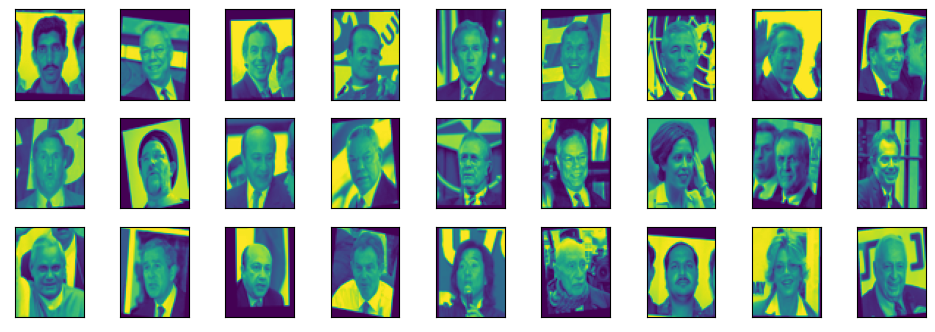

In [151]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                            figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

Сравнивая эти изображения со случайной выборкой изображений лиц
на рис., мы можем догадаться, почему они были помечены как шум:
на пятом фото в первом ряду изображен человек, пьющий из стакана,
также попадаются изображения людей в головных уборах, а на последнем
фото изображена рука перед лицом человека. Другие фото сняты с
необычного ракурса или имеют необычный план, который может быть
крупным или общим.
Подобного рода анализ, который пытается найти «лишнее»,
называется детекцией выбросов (outlier detection). Если бы это был
реальный пример, мы могли бы попытаться более аккуратно кадрировать
изображения, чтобы получить более однородные данные. Мы мало что
можем сделать с людьми, которые носят головные уборы, пьют или что-
то держат перед своими лицами, но имейте в виду, что они представляют
собой трудности, с которыми необходимо справиться.
Если мы хотим найти более интересные кластеры, а не просто один
большой кластер, нам нужно уменьшить значение eps, задать его в
интервале между 15 и 0.5 (значение по умолчанию). Давайте посмотрим,
к каким результатам приведут различные значения eps:

In [157]:
for eps in range(7,19,1):
    for min_samples in range(1,10,1):
        print("\neps={}".format(eps))
        print("\nmin_samples={}".format(min_samples))
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca)
        print("Полученные кластеры: {}".format(np.unique(labels)))
        print("Размеры кластеров: {}".format(np.bincount(labels + 1)))


eps=7

min_samples=1
Полученные кластеры: [   0    1    2 ... 2088 2089 2090]
Размеры кластеров: [0 1 1 ... 1 1 1]

eps=7

min_samples=2
Полученные кластеры: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Размеры кластеров: [2073  149    2    3    2    2    2    3    2    2    2    2    2    2
    2    2    2    2    2]

eps=7

min_samples=3
Полученные кластеры: [-1  0  1  2]
Размеры кластеров: [2103  149    3    3]

eps=7

min_samples=4
Полученные кластеры: [-1  0]
Размеры кластеров: [2113  145]

eps=7

min_samples=5
Полученные кластеры: [-1  0]
Размеры кластеров: [2118  140]

eps=7

min_samples=6
Полученные кластеры: [-1  0]
Размеры кластеров: [2128  130]

eps=7

min_samples=7
Полученные кластеры: [-1  0]
Размеры кластеров: [2129  129]

eps=7

min_samples=8
Полученные кластеры: [-1  0]
Размеры кластеров: [2130  128]

eps=7

min_samples=9
Полученные кластеры: [-1  0]
Размеры кластеров: [2134  124]

eps=8

min_samples=1
Полученные кластеры: [   0    1    2 ... 1806 1807 18

При низких значениях eps все точки помечаются как шум. Для eps=7
мы получаем большое количество шумовых точек и множество мелких
кластеров. Для eps=9 мы все еще получаем большое количество шумовых
точек, но при этом у нас появляется большой кластер и несколько
кластеров меньшего размера. Начиная с eps=11, мы получаем лишь один
большой кластер и шум.
Что интересно отметить, во всех случаях мы не смогли получить
больше одного крупного кластера. В лучшем случае мы получаем один
крупный кластер, который содержит большую часть точек, а также
несколько более мелких кластеров. Это указывает не на присутствие в
данных двух или трех различных типов изображений лиц, которые очень
легко распознать, а скорее на примерно одинаковую степень сходства
всех изображений, попавших в крупный кластер, между собой (или на
примерно одинаковую степень отличия изображений, попавших в
крупный кластер, от остальных).
Результаты для eps=7 выглядят наиболее интересно, здесь мы
получаем большое количество маленьких кластеров. Мы можем
исследовать результаты этой кластеризации более подробно,
визуализировав все точки данных для всех 13 кластеров меньшего
размера:

430
3
3


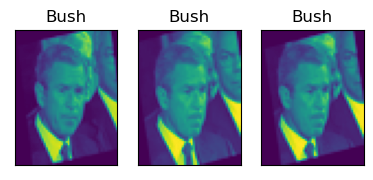

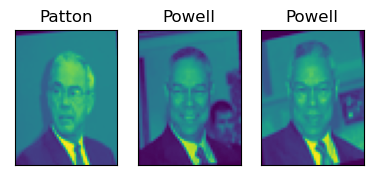

In [153]:
dbscan = DBSCAN(min_samples=3, eps=8)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    print(n_images)
    if n_images>30:
        continue 
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):

        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])


Некоторые кластеры соответствуют людям с очень отчетливыми
изображениями лиц (в рамках этого набора данных), например, Ариэлю
Шарону или Дзюнъитиро Коидзуми. В пределах каждого кластера также
фиксируется поворот и выражение лица. Некоторые кластеры содержат
лица разных людей, но при этом все лица имеют схожий поворот и
выражение лица.
На этом наш анализ набора изображений лиц с помощью алгоритма
DBSCAN завершается. Как вы можете видеть, в данном случае мы
осуществили ручной анализ данных, который сильно отличается от
метода автоматического поиска, примененного нами для машинного
обучения с учителем на основе R2 или правильности.
Теперь давайте перейдем к применению алгоритмов k-средних и
агломеративной кластеризации.

### Анализ набора изображений лиц с использованием алгоритма k-средних

Мы увидели, что с помощью алгоритма DBSCAN невозможно получить
больше одного большого кластера. Алгоритмы агломеративной
кластеризации и k-средних имеют гораздо больше шансов сформировать
кластеры одинакового размера, но нам задать нужное количество
кластеров. Мы могли бы задать количество кластеров равным известному
количеству людей в наборе данных, хотя очень маловероятно, что
алгоритм неконтролируемой кластеризации сможет восстановить их.
Вместо этого мы можем начать с небольшого количества кластеров
(например, с 10), которое, возможно, позволит нам проанализировать
каждый кластер:

In [158]:
# извлекаем кластеры с помощью k-средних
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Размеры кластеров k-средние: {}".format(np.bincount(labels_km)))

Размеры кластеров k-средние: [143 364 337 165 161 296 336 298  32 126]


Видно, что алгоритм кластеризации k-средних распределил данные по
кластерам, размер которых варьирует от 64 до 386 изображений. Это
сильно отличается от результата алгоритма DBSCAN.
Далее мы можем проанализировать результаты алгоритма k-средних,
визуализировав центры кластеров (рис.). Поскольку мы
кластеризировали данные, полученные с помощью PCA, нам нужно
повернуть центры кластеров обратно в исходное пространство, чтобы
визуализировать их, используя pca.inverse_transform:

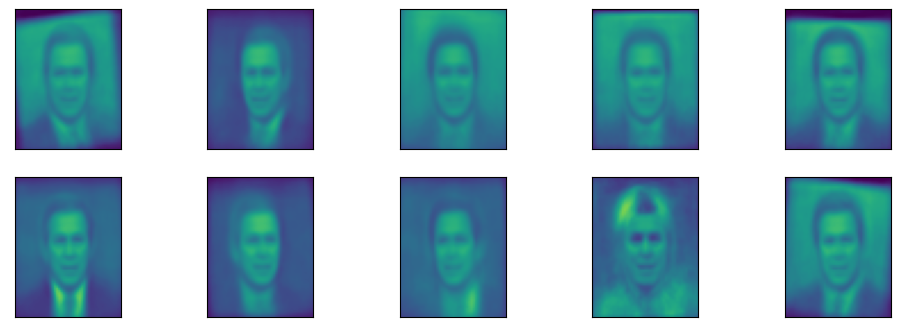

In [159]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),vmin=0, vmax=1)

Центры кластеров, найденные с помощью алгоритма k-средних,
представляют собой сильно сглаженные лица. Это неудивительно,
учитывая, что каждый центр – это усредненное изображение лиц,
попавших в кластер. Использование уменьшенного с помощью PCA
представления данных усиливает сглаженность изображений (сравните с
реконструкциями лиц на рис., когда использовалось 100 компонент).
Похоже, что кластеризация выделила разные повороты лиц, разные
выражения лиц (кажется, третий центр кластера показывает
улыбающееся лицо), а также наличие воротника у рубашки (смотрите
предпоследний центр кластера).
Для более детального просмотра на рис. мы выведем для каждого
центра кластера пять наиболее типичных изображений в кластере
(изображения, присвоенные кластеру и находящиеся ближе всего к
центру кластера) и пять самых нетипичных изображений в кластере
(изображения, присвоенные кластеру и находящиеся дальше всего от
центра кластера):

ValueError: cannot reshape array of size 2914 into shape (87,65)

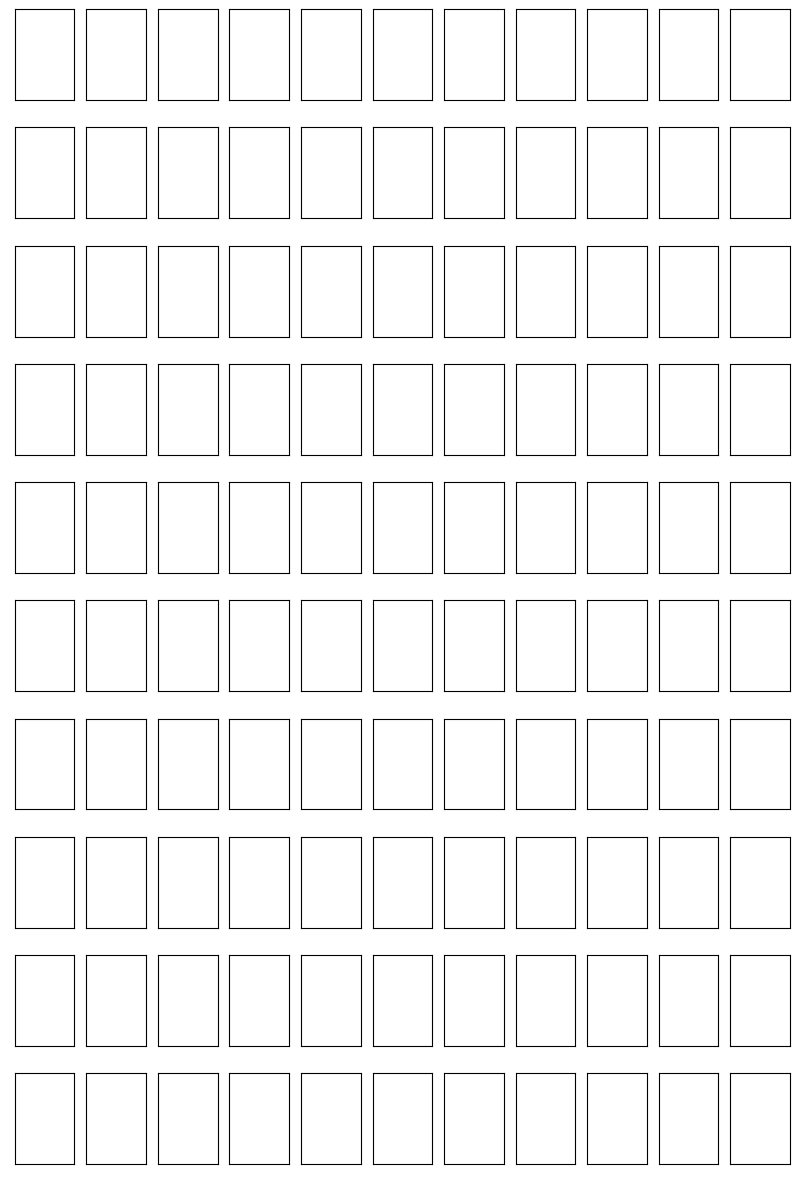

In [160]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,y_people, people.target_names)

Рис. подтверждает наш вывод об улыбающих лицах в третьем
кластере и важности поворота лица для других кластеров. Однако
«нетипичные» точки сильно отличаются от центров кластеров и их
назначение кластеру кажется несколько произвольным. Это может быть
обусловлено тем фактом, что алгоритм k-средних разбивает все точки
данных на группы и в отличие от алгоритма DBSCAN в нем отсутствует
понятие «шумовая точка». При использовании большего количества
кластеров алгоритм сможет найти более тонкие различия. Однако
увеличения числа кластеров сделает ручной анализ еще более
трудоемким.

Теперь давайте посмотрим на результаты агломеративной кластеризации:

In [163]:
# извлекаем кластеры с помощью агломеративной кластеризации по методу Варда
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Размеры кластеров для агломеративной кластеризации: {}".format(np.bincount(labels_agg)))

Размеры кластеров для агломеративной кластеризации: [ 76 247 960 265  79 134 292  26  77 102]


Видно, что алгоритм агломеративной кластеризации распределил
данные по кластерам, размер которых варьирует от 26 до 623
изображений. В отличие от алгоритма k-средних размеры кластеров
варьируют сильнее, но при этом значительно меньше, если сравнивать их
с размерами кластеров, полученными с помощью алгоритма DBSCAN.
Мы можем вычислить ARI, чтобы оценить сходство результатов,
полученных с помощью агломеративной кластеризации и кластеризации
k-средних:

In [167]:
 people.target

array([200,  41,  49, ...,  65,  67,  65], dtype=int64)

In [168]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))
print("ARI: {:.2f}".format(adjusted_rand_score( people.target, labels_km)))
print("ARI: {:.2f}".format(adjusted_rand_score( people.target, labels_agg)))

ARI: 0.06
ARI: 0.01
ARI: 0.01


Значение ARI, равное всего лишь 0.06, означает, что кластеризации
labels_agg и labels_km имеют мало общего между собой. Это
неудивительно, учитывая тот факт, что в алгоритме k-средних точки,
удаленные от центров кластеров, по-видимому, имеют мало общего
между собой.

Далее мы можем построить дендрограммы. Мы ограничим 
глубину дерева, поскольку ветвление по 2063 отдельным точкам данных 
приведет к построению нечитаемоего очень плотного графика: 

In [169]:
X_pca.shape

(2258, 100)

Text(0, 0.5, 'Кластерное расстояние')

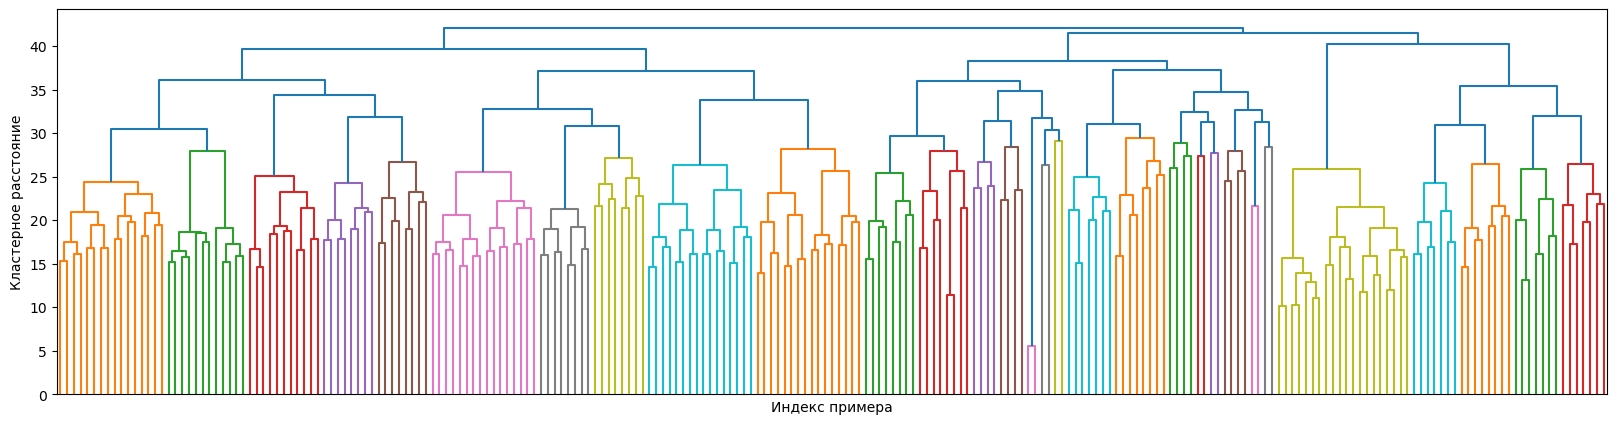

In [170]:
# импортируем функцию dendrogram и функцию кластеризации ward из SciPy
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X_pca) 
# строим дендрограмму для linkage_array 
# содержащего расстояния между кластерами 
plt.figure(figsize=(20, 5)) 
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True) 
plt.xlabel("Индекс примера") 
plt.ylabel("Кластерное расстояние") 

Построив 10 кластеров, мы срезаем дерево в самой верхней части, в 
которой  расположены  10  вертикальных  линий.  На  дендрограмме, 
построенной для синтетических данных (рис.), вы, проанализировав 
длину ветвей, могли прийти к выводу, что два или три кластера могут 
описать данные надлежащим образом. Что касается набора изображений 
лиц,    здесь,  по-видимому,  не  будет  какого-то  очевидного  числа. 
Некоторые ветви представляют собой более четко обособленные группы, 
но,  по-видимому,  это  никак  не  связано  с  оптимальным  количеством 
кластеров.  Это  неудивительно,  учитывая  результаты  алгоритма 
DBSCAN, который попытался сгруппировать все кластеры вместе. 

Попробуем визуализируем эти 10 кластеров, как мы это делали ранее для
алгоритма k-средних (рис.). Обратите внимание, что в
агломеративной кластеризации не существует такого понятия, как центр
кластера (хотя мы могли бы вычислить среднее значение) и мы просто
показываем первые несколько точек в каждом кластере. Кроме того, мы
покажем количество точек в каждом кластере, выведя его слева от
первого изображения каждого ряда:

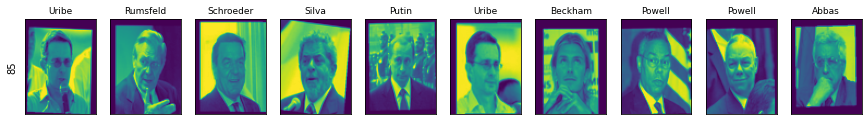

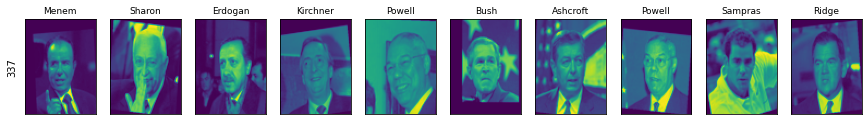

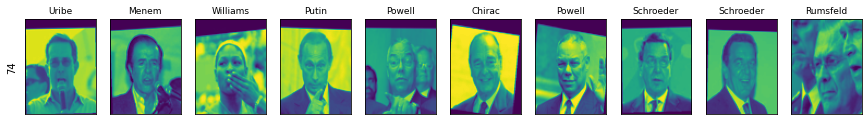

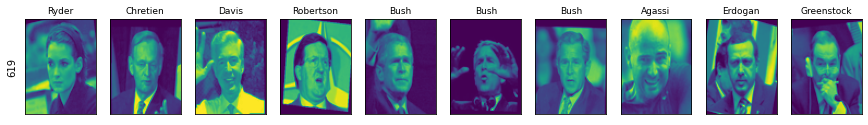

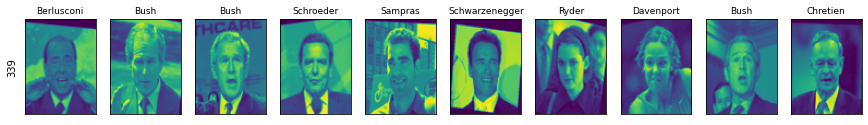

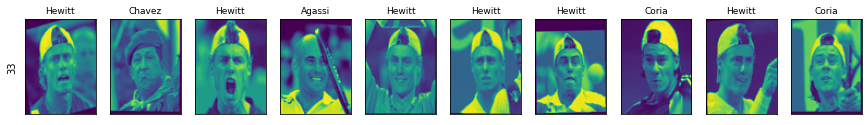

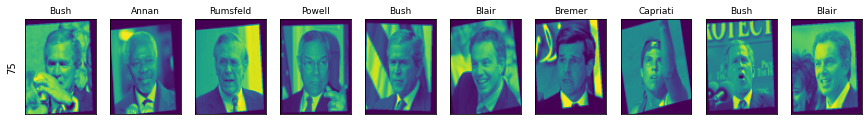

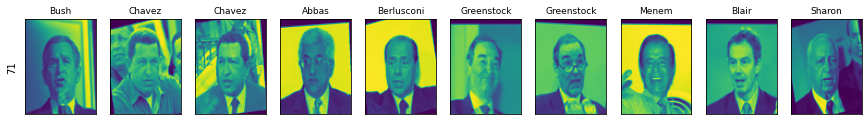

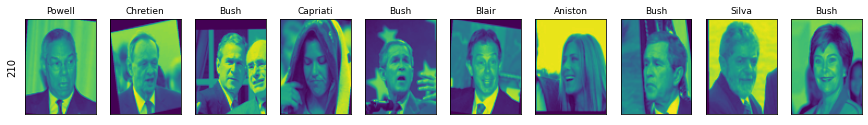

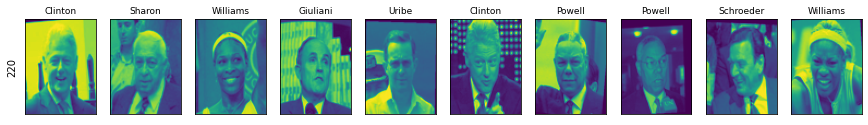

In [147]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})

Хотя некоторые кластеры, похоже, имеют содержательную
интерпретацию, многие из них слишком велики, чтобы быть на самом
деле однородными. Чтобы получить более однородные кластеры, мы
можем запустить алгоритм снова, на этот раз с 40 кластерами, и выбрать
некоторые особо интересные кластеры (рис.):

cluster sizes agglomerative clustering: [102  26 127  38  30  33  75  19  51 214  33  70  35  32  43   7  55 207
  40  31 129  60  61  64  25  60  93  32  33  19  30   6  16  33  21  37
  21  22  22  11]


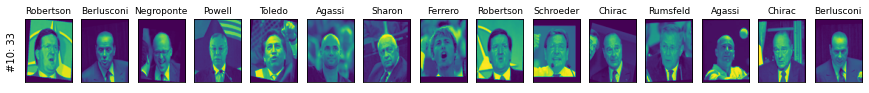

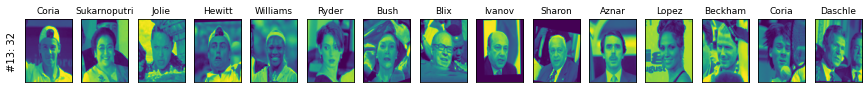

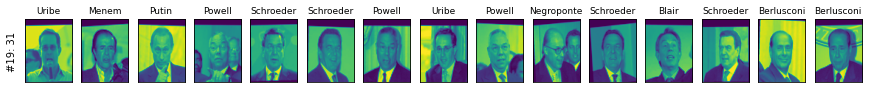

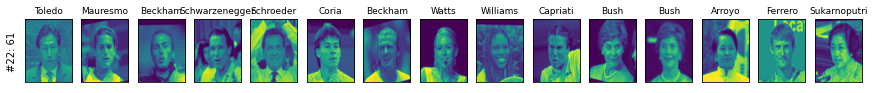

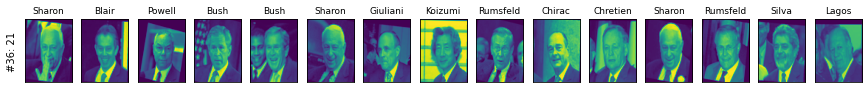

In [148]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

В данном случае кластеризация, похоже, выделила «улыбчивых
чернокожих», «любителей рубашек с воротником», «улыбчивых
женщин», «Хусейнов» и «высоколобых». Кроме того, мы могли бы найти
аналогичные кластеры с помощью дендрограммы, если бы проводили
более детальный анализ.

Этот раздел показал, что применение алгоритмов кластеризации с
последующей оценкой их результатов является сложной и, как правило,
очень полезной процедурой на исследовательском этапе анализа данных.
Мы рассмотрели три алгоритма кластеризации: k-средние, DBSCAN и
агломеративную кластеризацию. Все три алгоритма имеют возможность
настраивать гранулярность кластеризации. Алгоритмы k-средних и
агломеративной кластеризации позволяют задать нужное количество
кластеров, в то время как DBSCAN позволяет задать близость между
точками с помощью параметра ets, который косвенно влияет на размер
кластера. Все три метода могут быть использованы на больших реальных
наборах данных, имеют относительно простую интепретацию и
допускают разбиение на большое количество кластеров.
Каждый из алгоритмов имеет свои преимущества. Алгоритм k-
средних позволяет описывать кластеры с помощью их средних значений.
Кроме того, его можно рассматривать как декомпозиционный метод, в
котором каждая точка данных представлена центром кластера. DBSCAN
позволяет определить «шумовые точки», которые не присвоены ни
одному кластеру, и он может помочь автоматически определить
количество кластеров. В отличие от двух остальных методов он
допускает наличие кластеров сложной формы, как мы уже видели на
примере набора данных two_moons. Иногда DBSCAN выделяет кластеры,
сильно отличающиеся по своим размерам, что может быть как
недостатком, так и преимуществом этого алгоритма. Агломеративная
кластеризация позволяет построить исчерпывающую иерархию
возможных разбиений данных.